# A tour of geoms

### Bars

In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


- What data might make for a good bar chart?

- what would the chart properties be?

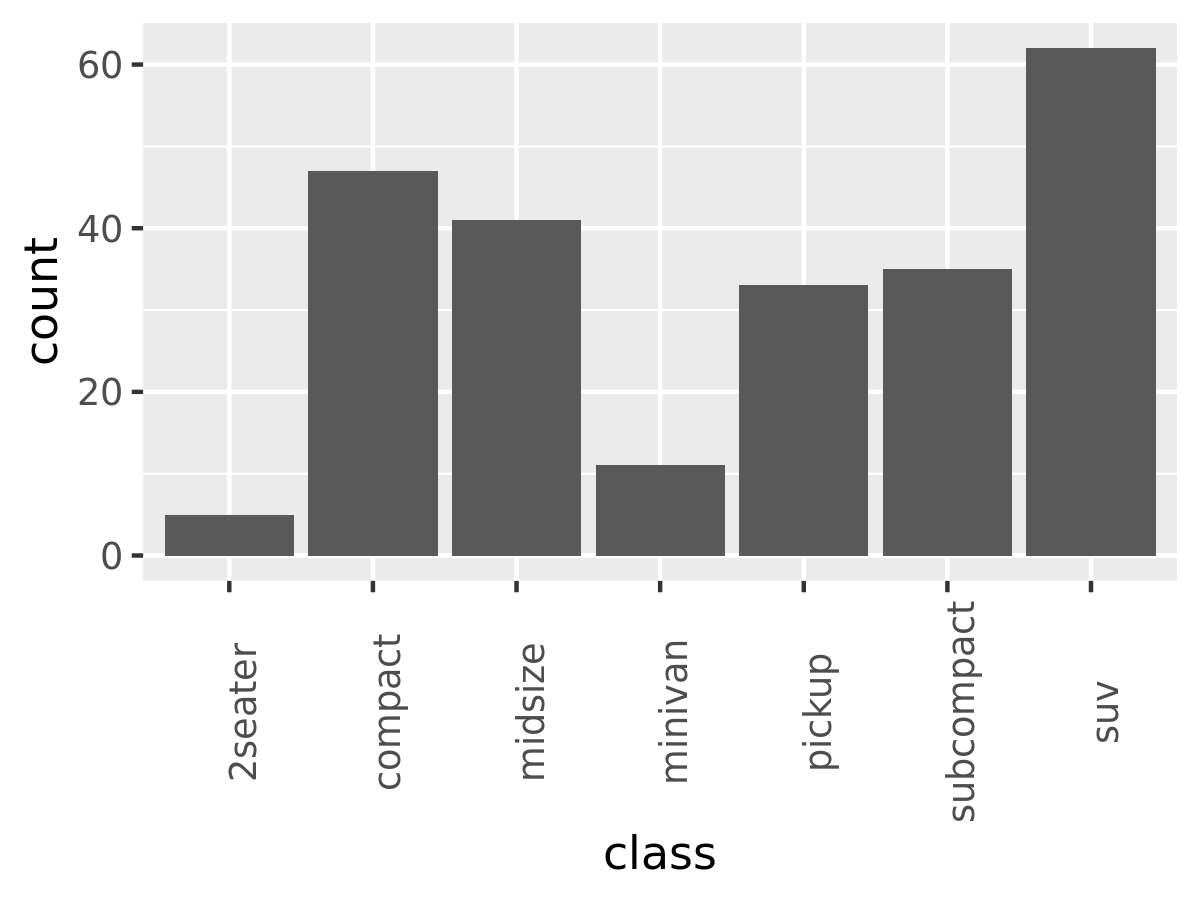

In [3]:
p = ggplot(mpg, aes(x = class)) +
    geom_bar() +
    theme(axis.text.x = element_text(angle = 90))

p

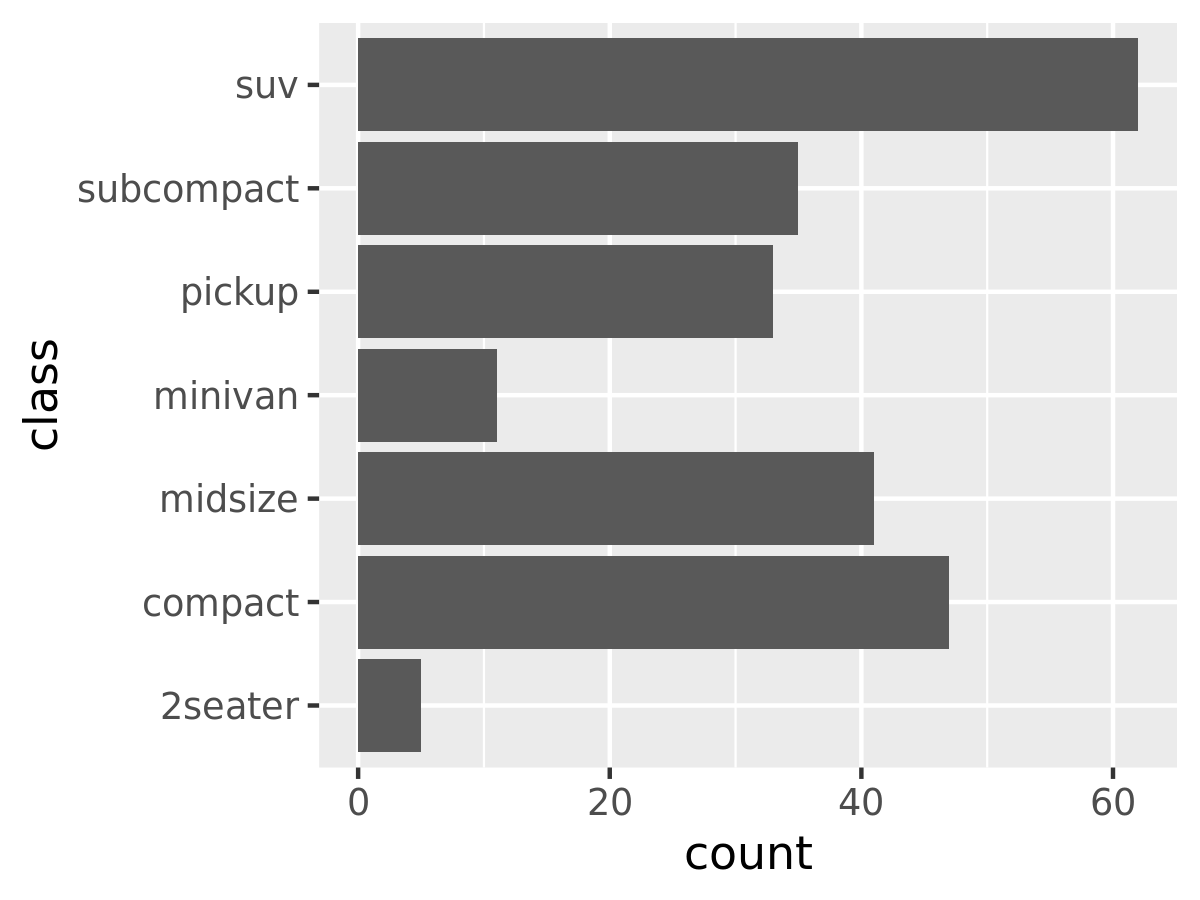

In [4]:
p = ggplot(mpg, aes(y = class))

p = p + geom_bar()

p

In [5]:
mpg$class %>% table

.
   2seater    compact    midsize    minivan     pickup subcompact        suv 
         5         47         41         11         33         35         62 

- how do we make a bar chart if given values (i.e. not a chart of row counts)?

In [6]:
mpg %>%
    group_by(class) %>%
    summarize(sum_displ = sum(displ))

class,sum_displ
<chr>,<dbl>
2seater,30.8
compact,109.3
midsize,119.8
minivan,37.3
pickup,145.8
subcompact,93.1
suv,276.3


In [7]:
mpg_agg = mpg %>%
    group_by(class) %>%
    count()

mpg_agg

class,n
<chr>,<int>
2seater,5
compact,47
midsize,41
minivan,11
pickup,33
subcompact,35
suv,62


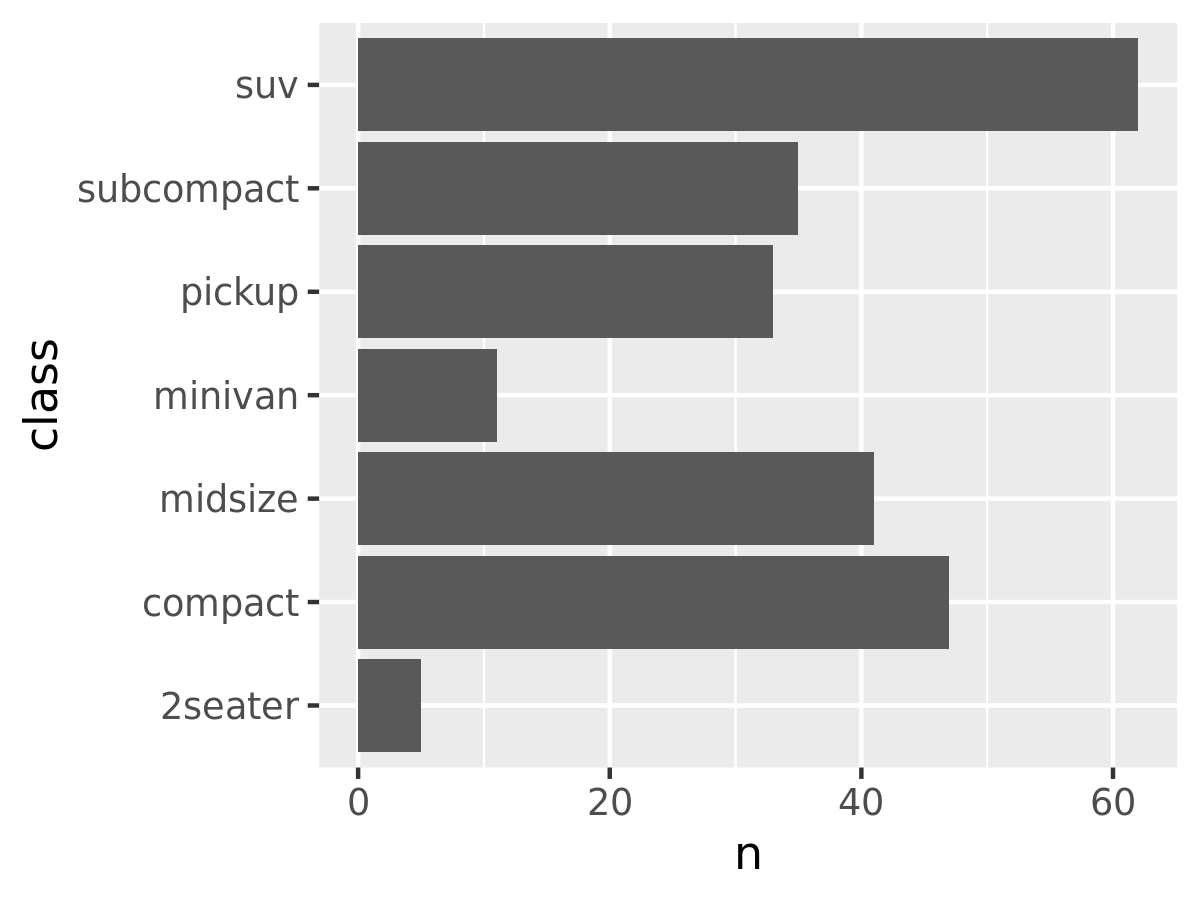

In [8]:
p = ggplot(mpg_agg, aes(y = class, x = n)) +
    geom_col()

p

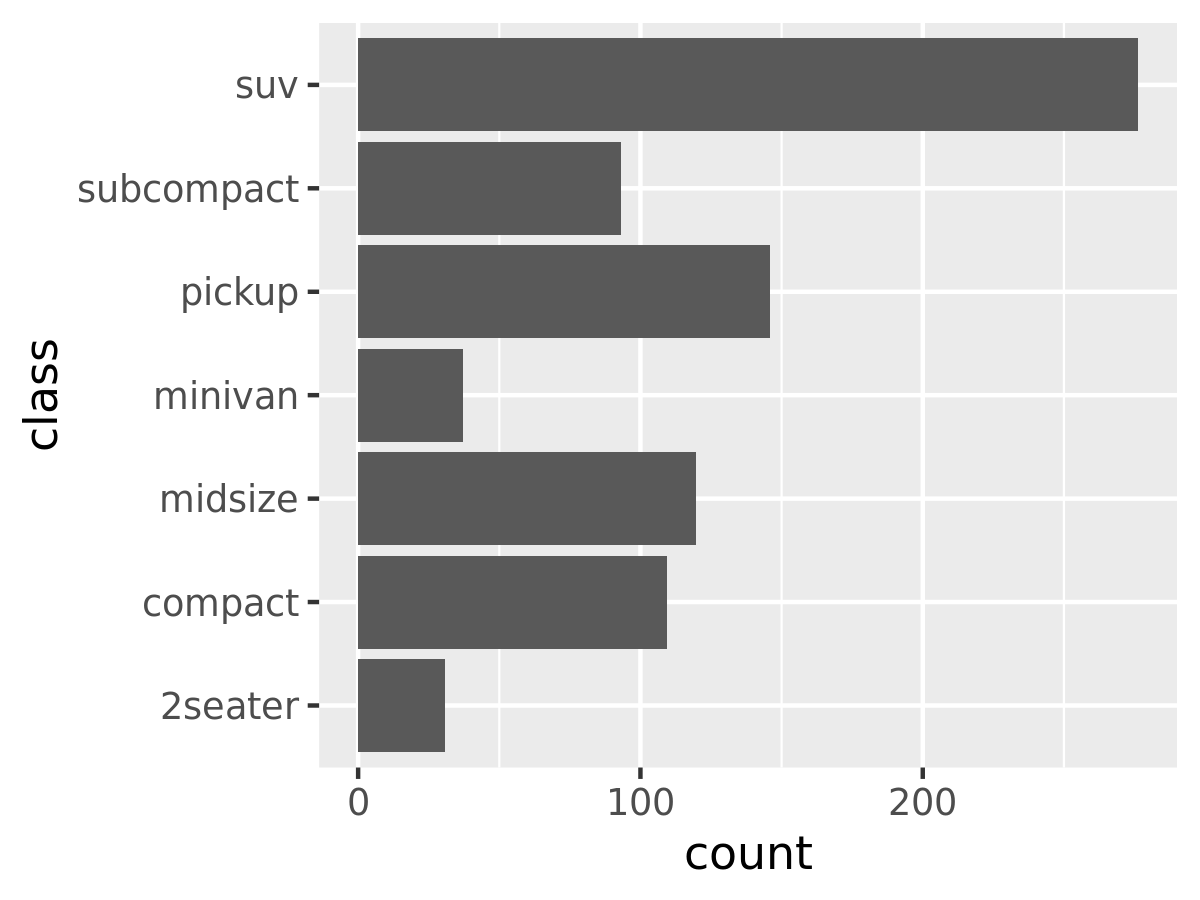

In [9]:
p = ggplot(mpg, aes(y = class, weight = displ))

p = p + geom_bar()

p

In [10]:
df = mpg %>%
    group_by(class) %>%
    summarize(sum_displ = sum(displ))

df

class,sum_displ
<chr>,<dbl>
2seater,30.8
compact,109.3
midsize,119.8
minivan,37.3
pickup,145.8
subcompact,93.1
suv,276.3


- what's "x"?

- what's "y"?

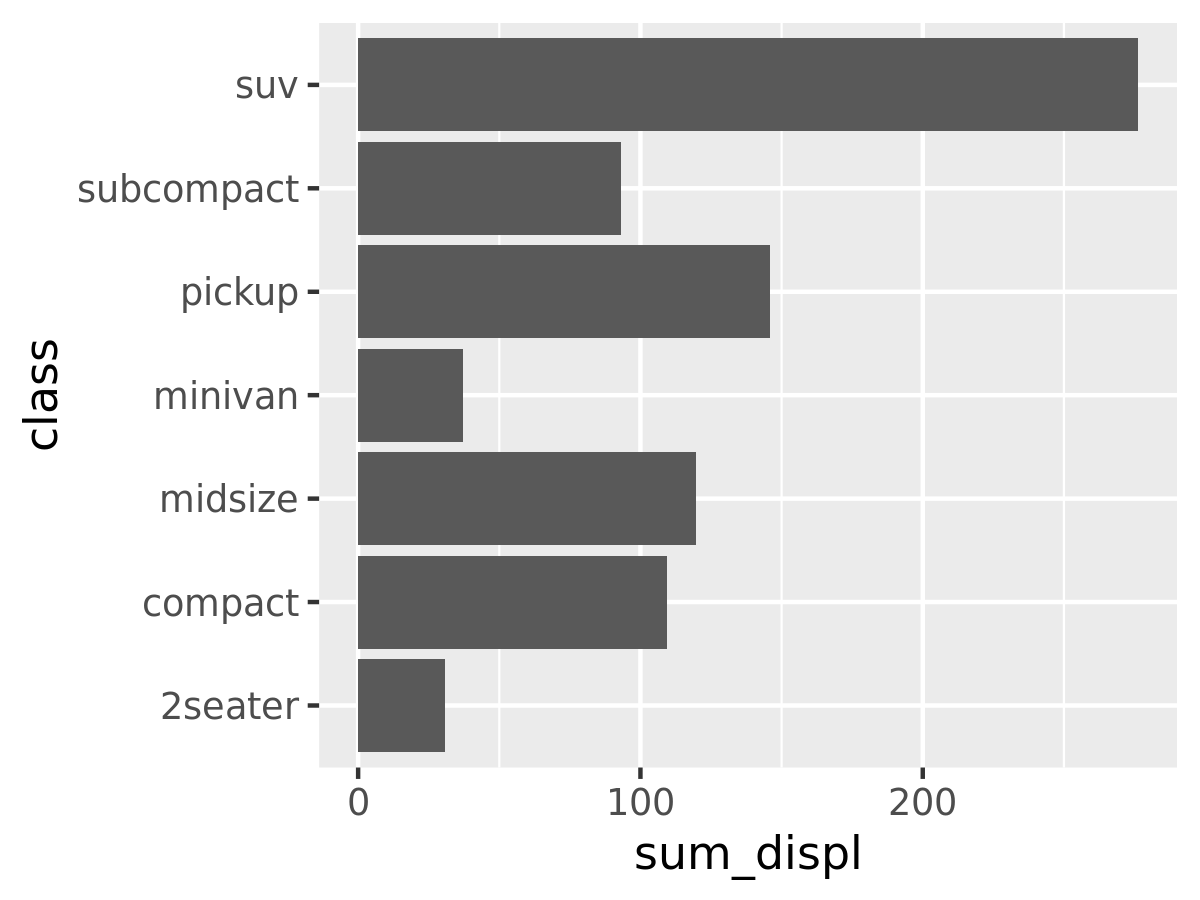

In [11]:
p = ggplot(df, aes(y = class, x = sum_displ))

p = p + geom_col()

p

- Sorting bars is important

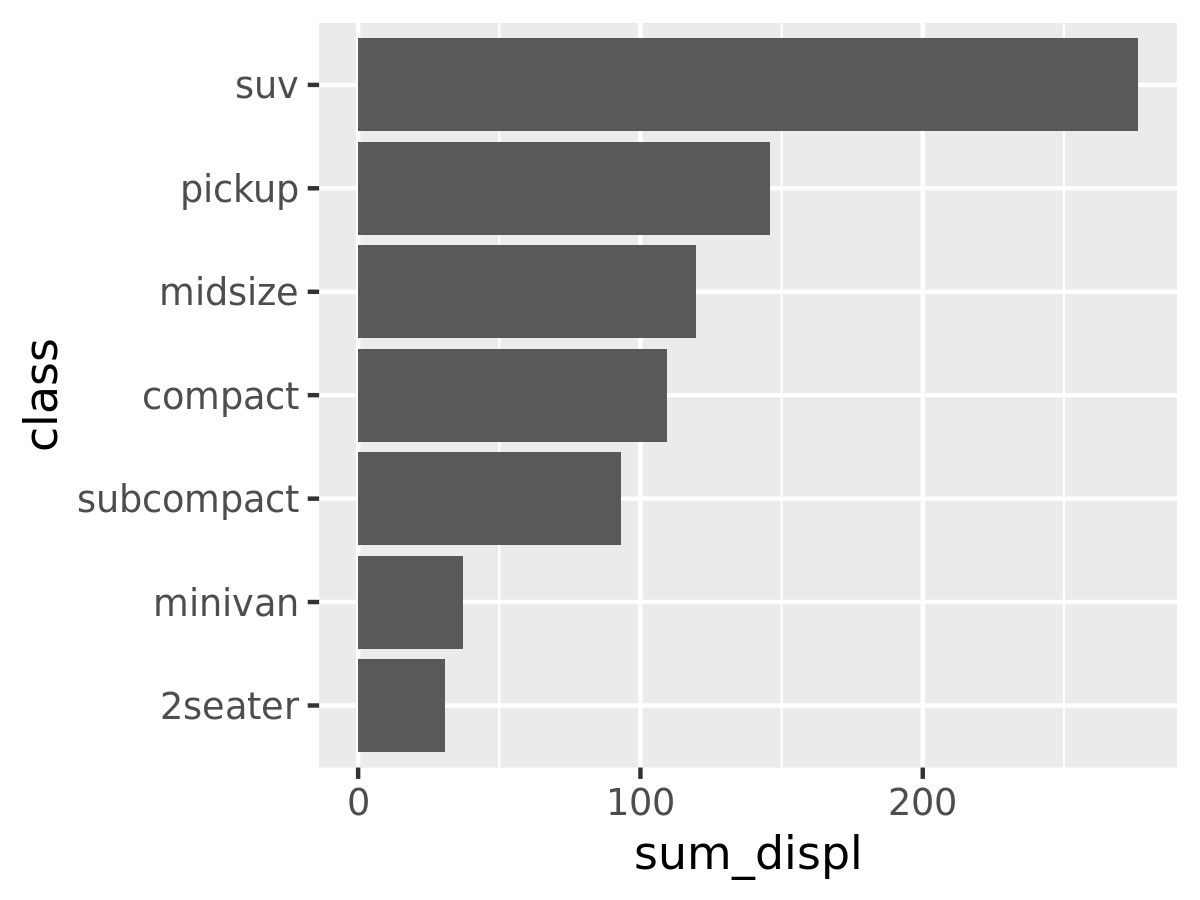

In [12]:
df.sorted = df %>% mutate(class = fct_reorder(class, sum_displ))

p = ggplot(df.sorted, aes(y = class, x = sum_displ))

p = p + geom_col()

p

- rotating labels

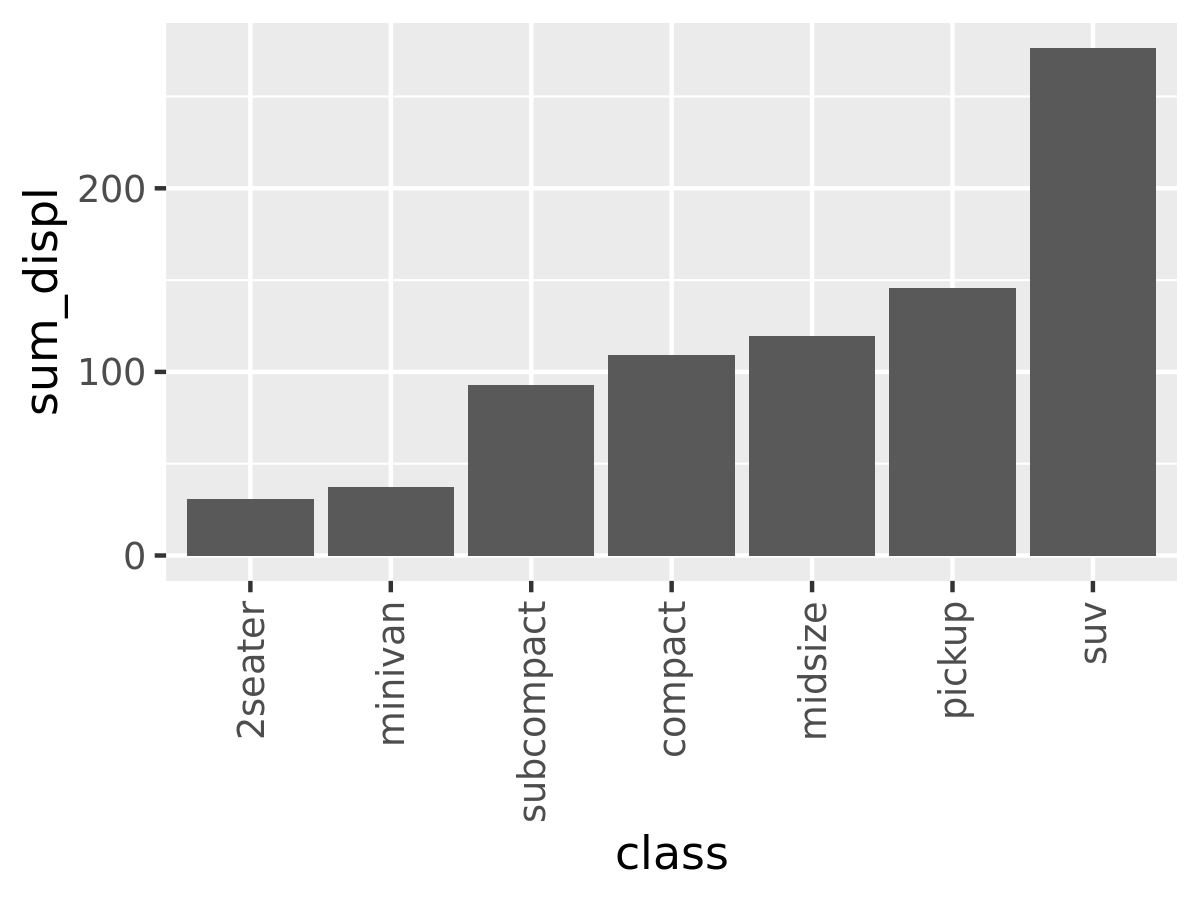

In [13]:
df.sorted = df %>% mutate(class = fct_reorder(class, sum_displ))

p = ggplot(df.sorted, aes(x = class, y = sum_displ))

p = p + geom_col()

p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

p

- coord_flip

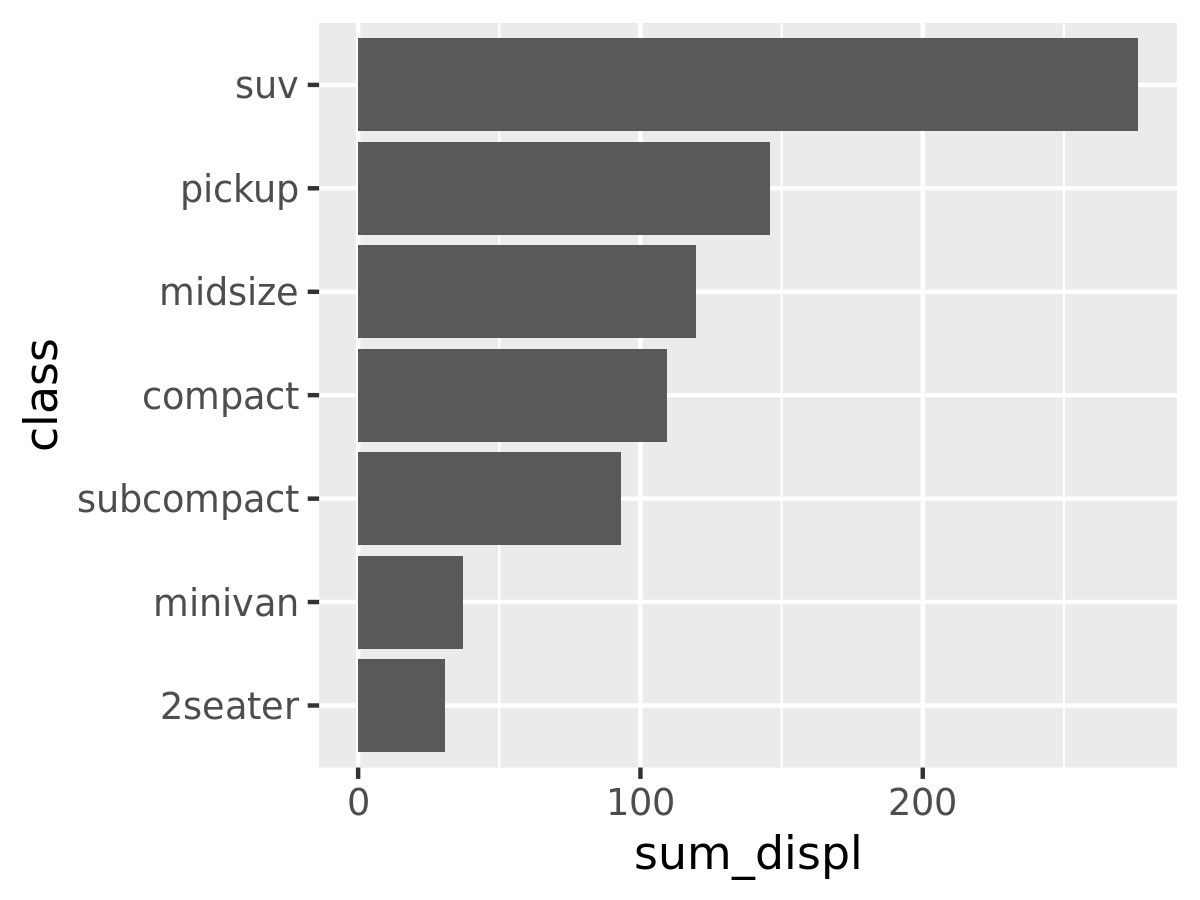

In [14]:
df.sorted = df %>% mutate(class = fct_reorder(class, sum_displ))

p = ggplot(df.sorted, aes(x = class, y = sum_displ))

p = p + geom_col()

p = p + coord_flip()

p

- when would we use `geom_bar`?

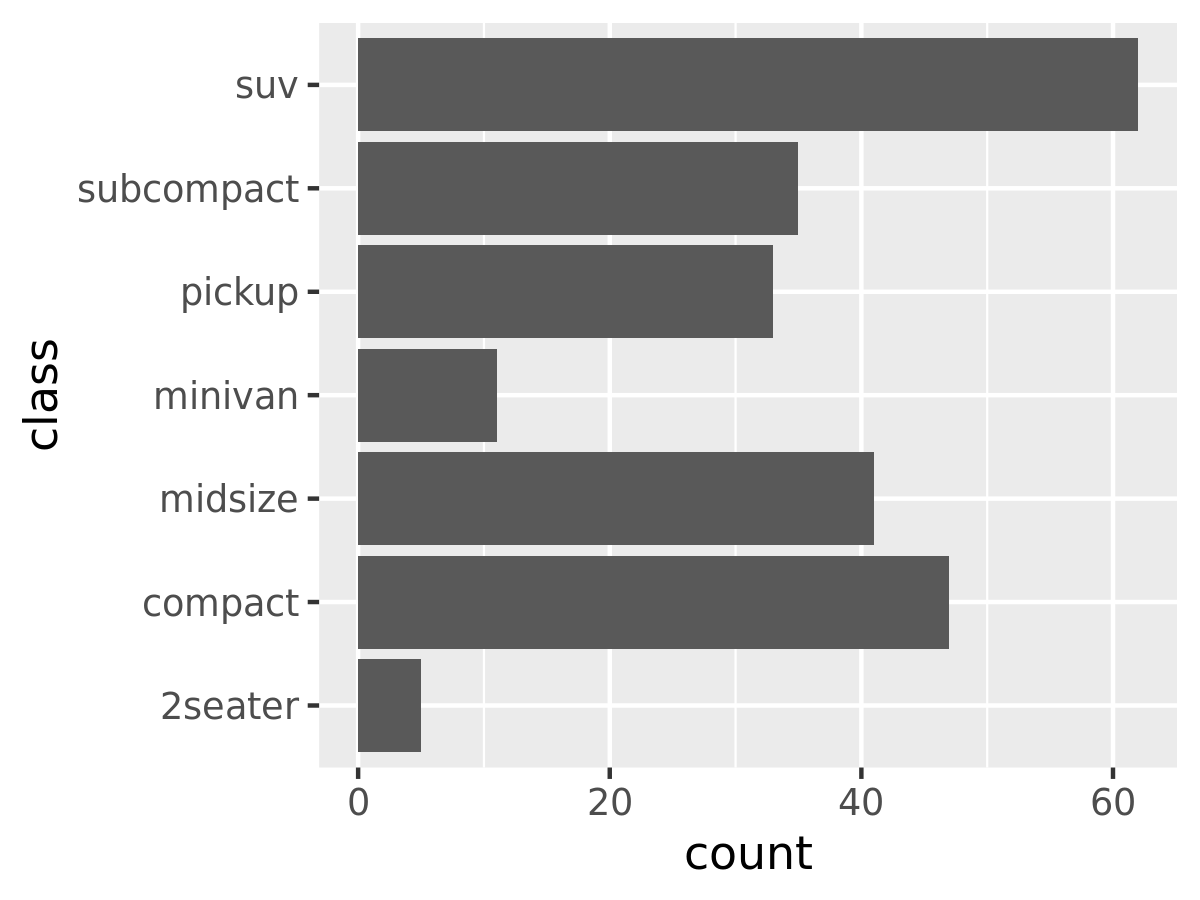

In [15]:
p = ggplot(mpg, aes(y = class))

p = p + geom_bar()

p

In [16]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


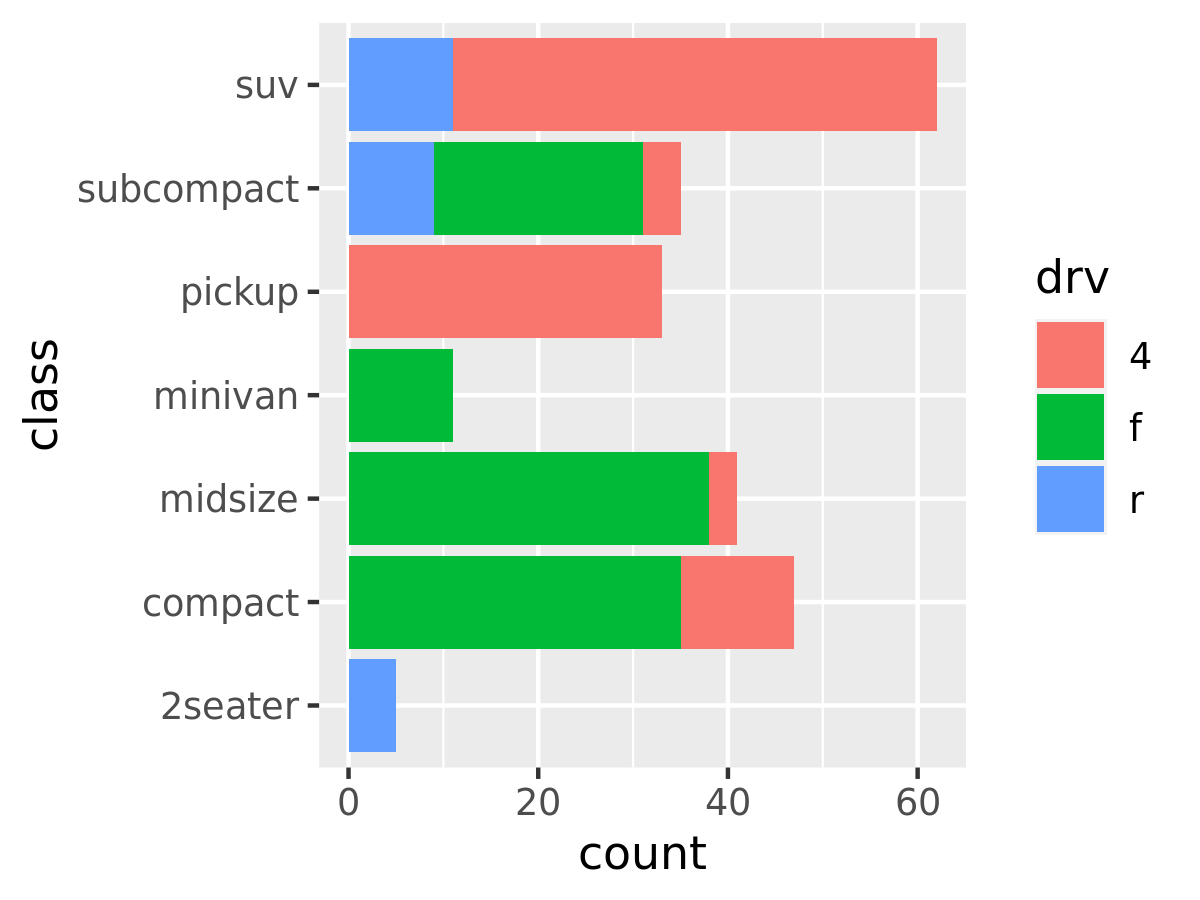

In [17]:
# color refers to outline, fill refers to fill

p = ggplot(mpg, aes(y = class, fill = drv))

p = p + geom_bar()

# p  = p + scale_fill_brewer(palette = "Dark2")

p

### Lines

In [18]:
test.data = data.frame(
    cat1 = 100 + c(0, cumsum(runif(49, -20, 20))),
    cat2 = 150 + c(0, cumsum(runif(49, -10, 10))),
    date = seq(as.Date("2002-01-01"), by="1 month", length.out=100)
) %>% gather(category, value, -date)

test.data %>% head()

,date,category,value
,<date>,<chr>,<dbl>
1,2002-01-01,cat1,100.00000
2,2002-02-01,cat1,100.79615
3,2002-03-01,cat1,85.05626
4,2002-04-01,cat1,91.41449
5,2002-05-01,cat1,104.77994
6,2002-06-01,cat1,123.32662


- for a line plot of date versus value, what are the properties in the mapping?

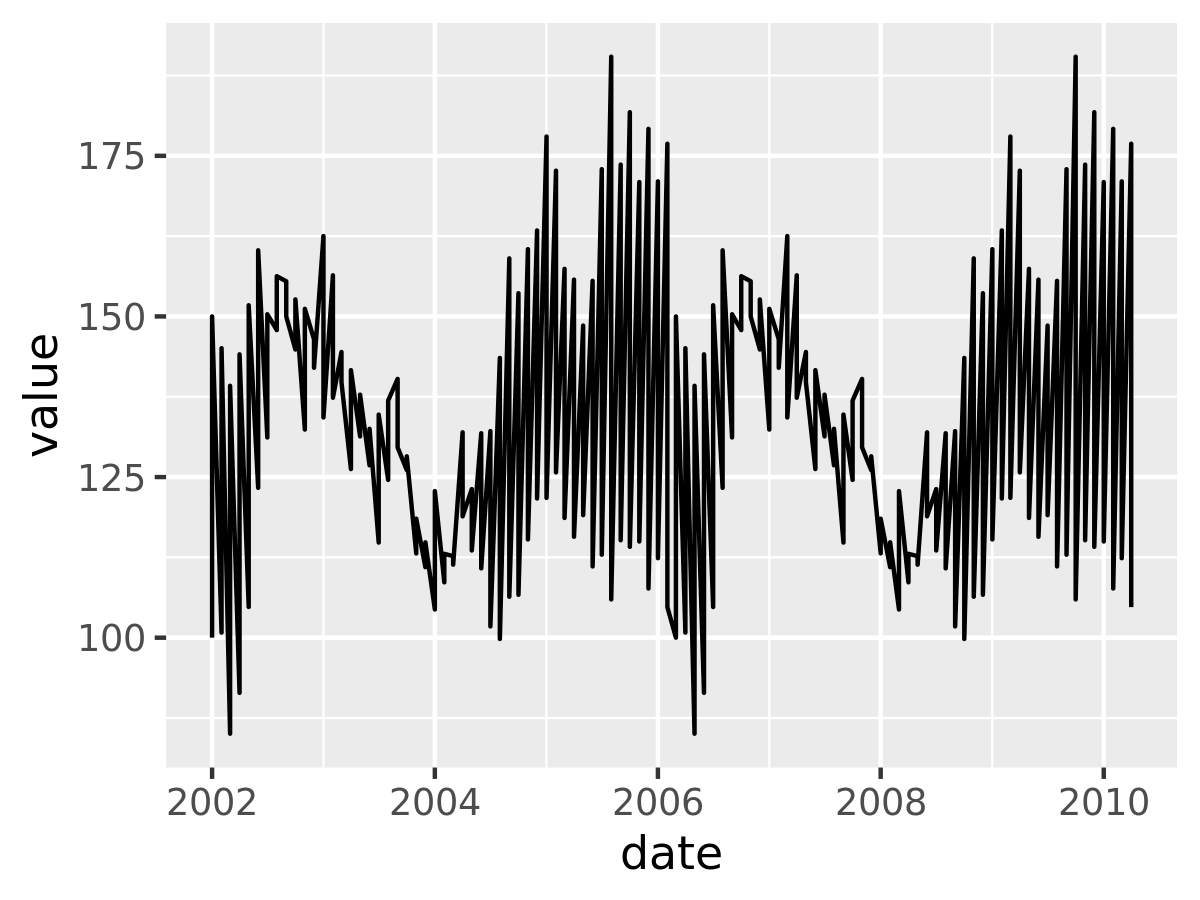

In [19]:
p = ggplot(test.data, aes(x = date, y = value))

p = p + geom_line()

p

In [20]:
test.data %>% head(5)

,date,category,value
,<date>,<chr>,<dbl>
1,2002-01-01,cat1,100.00000
2,2002-02-01,cat1,100.79615
3,2002-03-01,cat1,85.05626
4,2002-04-01,cat1,91.41449
5,2002-05-01,cat1,104.77994


- How can we plot each category independently?

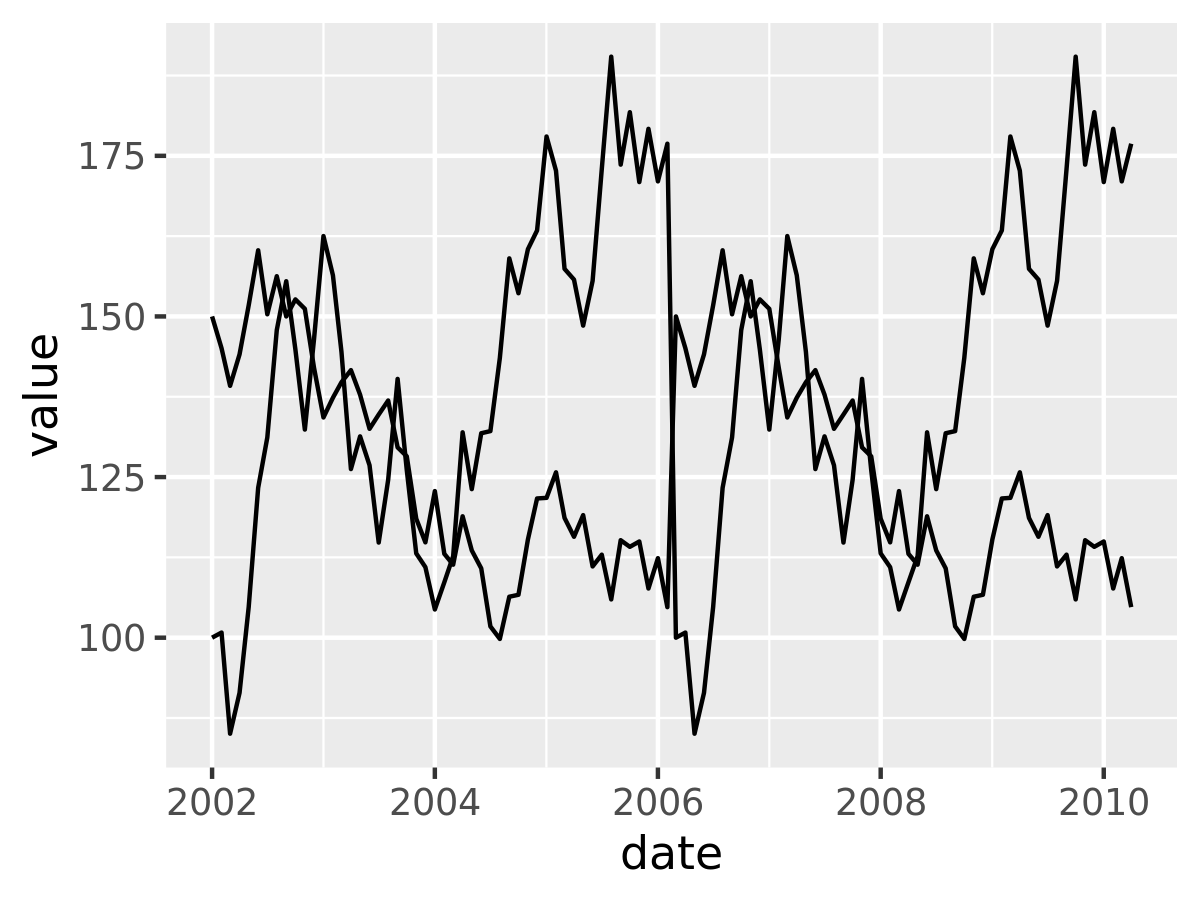

In [21]:
p = ggplot(test.data, aes(x = date, y = value, group = category))

p = p + geom_line()

p

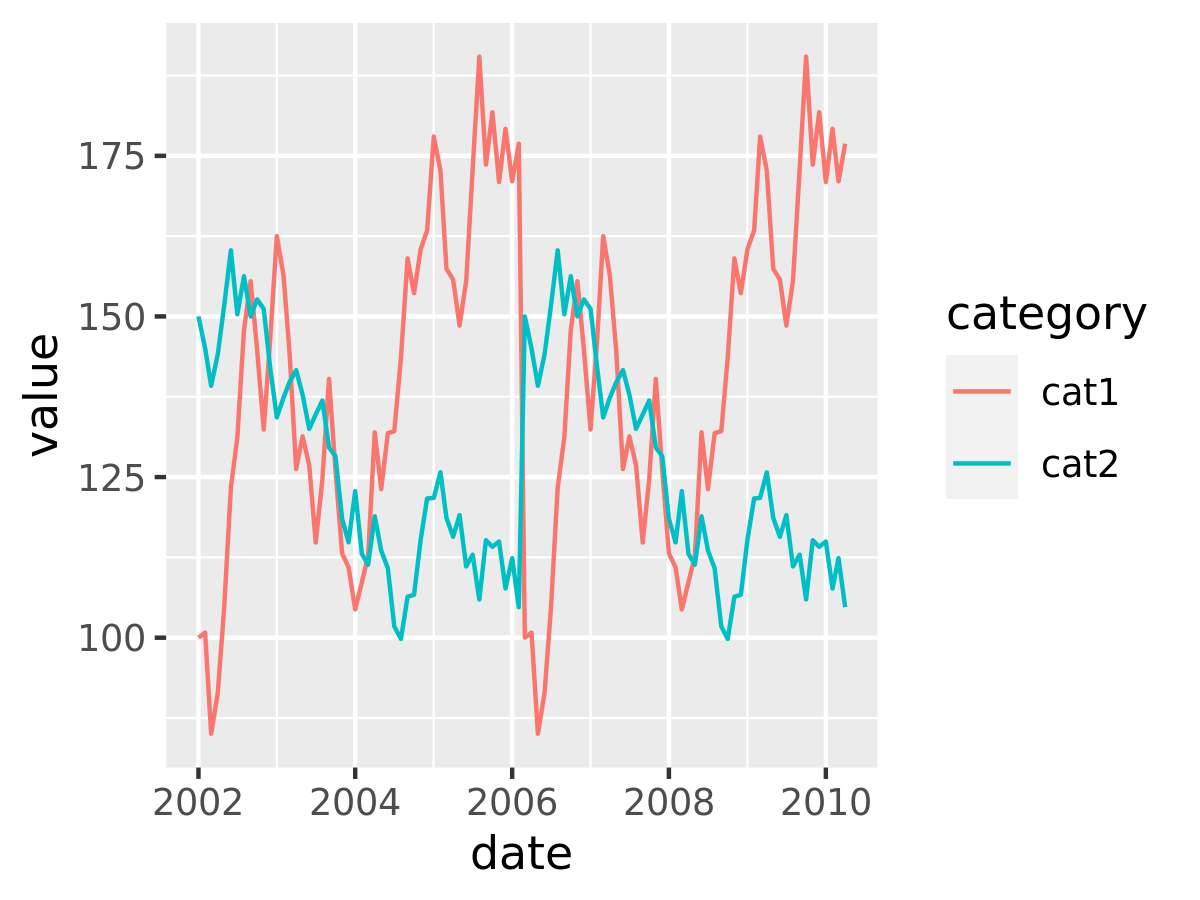

In [22]:
p = ggplot(test.data, aes(x = date, y = value, color = category))

p = p + geom_line()

p

### Smooth

In [23]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


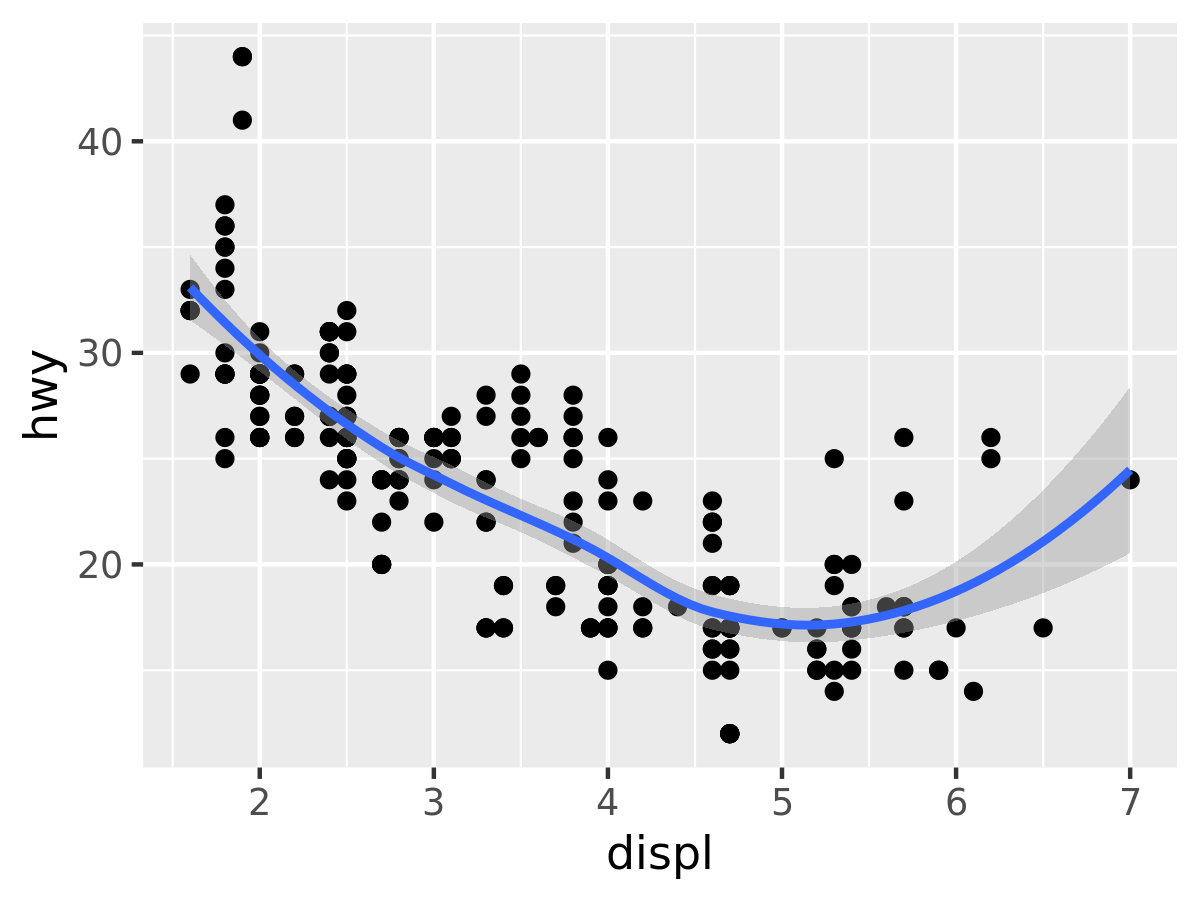

In [24]:
p = ggplot(mpg, aes(x = displ, y = hwy))

p = p + geom_point()

p = p + geom_smooth()

p

`geom_smooth()` using formula = 'y ~ x'


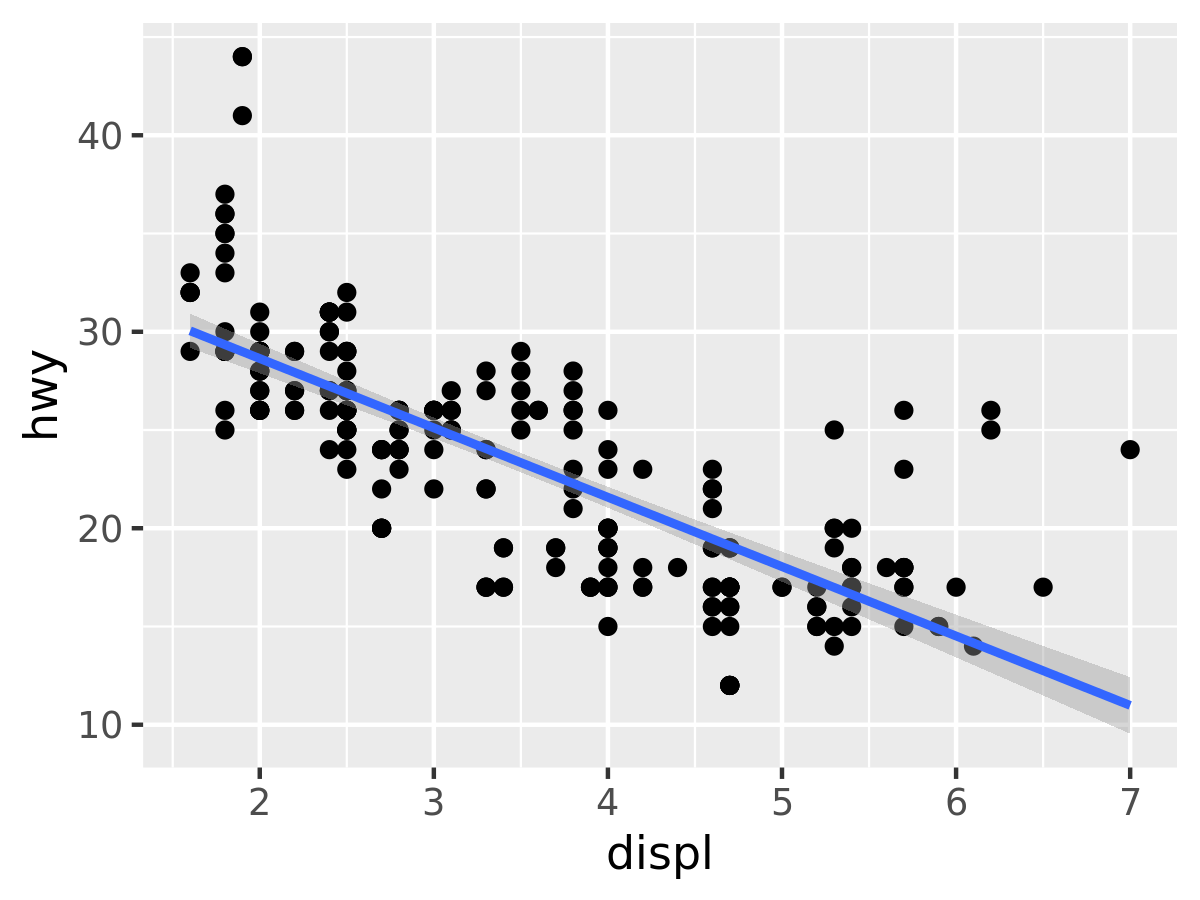

In [25]:
p = ggplot(mpg, aes(x = displ, y = hwy))

p = p + geom_point()

p = p + geom_smooth(method = 'lm')
# uses a linear model

p

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


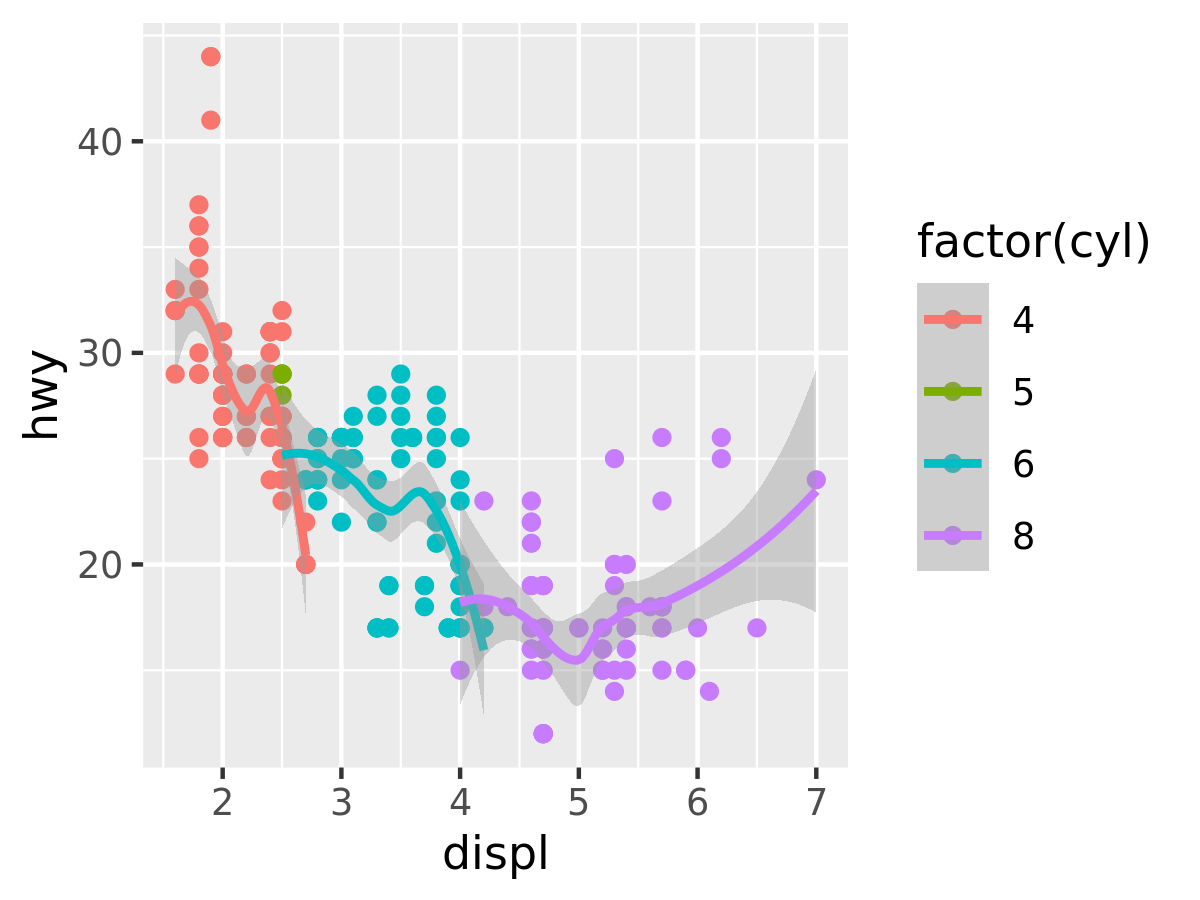

In [26]:
p = ggplot(mpg, aes(x = displ, y = hwy, color = factor(cyl)))

p = p + geom_point()

p = p + geom_smooth()

p

### Tiles

In [27]:
nba.data = read.csv("http://datasets.flowingdata.com/ppg2008.csv") %>%
    gather(stat, value, -Name) %>%
    group_by(stat) %>%
    mutate(value.scaled = scales::rescale(value))

nba.data %>% head

Name,stat,value,value.scaled
<chr>,<chr>,<dbl>,<dbl>
Dwyane Wade,G,79,0.9473684
LeBron James,G,81,0.9824561
Kobe Bryant,G,82,1.0000000
Dirk Nowitzki,G,81,0.9824561
Danny Granger,G,67,0.7368421
Kevin Durant,G,74,0.8596491


- Heatmap of stats side-by-side?
- What are the chart properties?

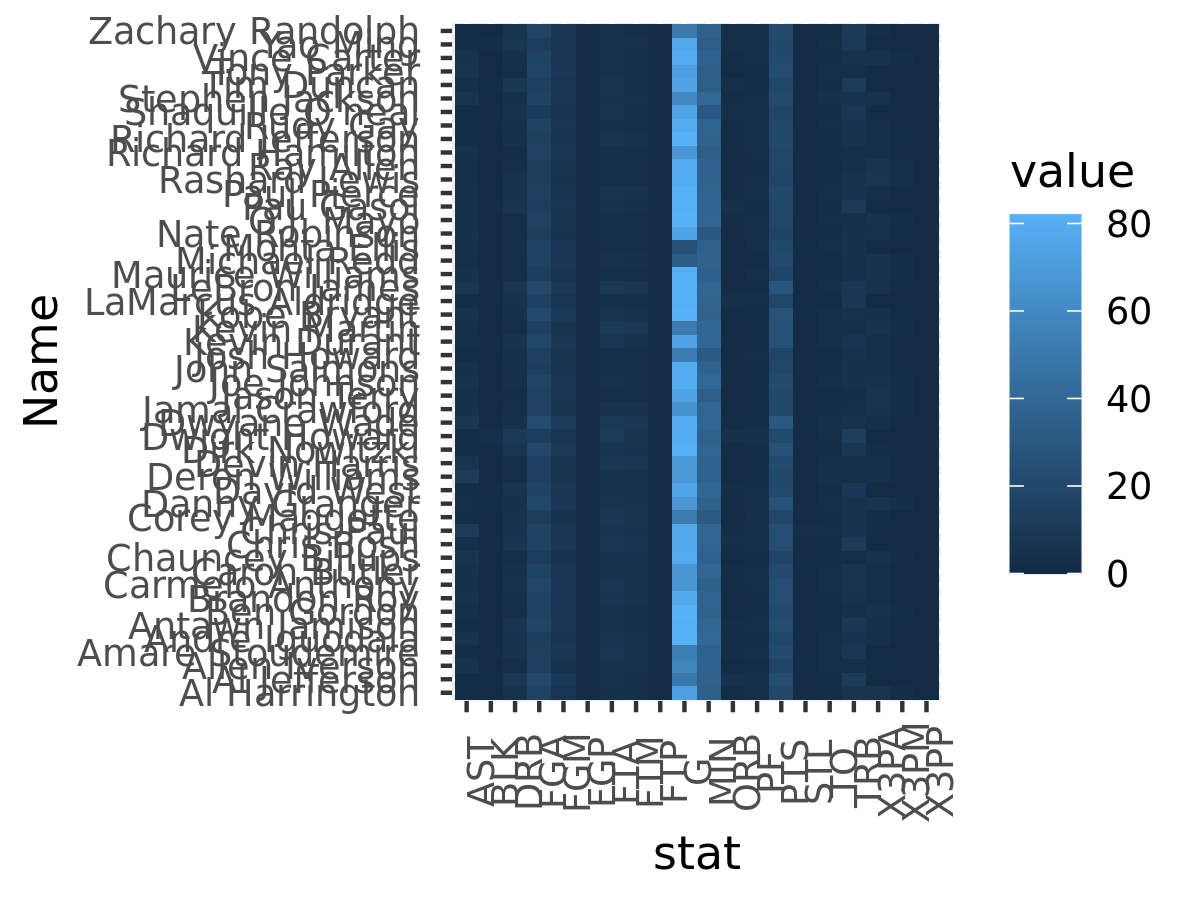

In [28]:
p = ggplot(nba.data, aes(x = stat, y = Name, fill = value))

p = p + geom_tile()

p = p + theme(axis.text.x = element_text(angle = 90))

p

- same color applied to each cell -- need to scale each column.

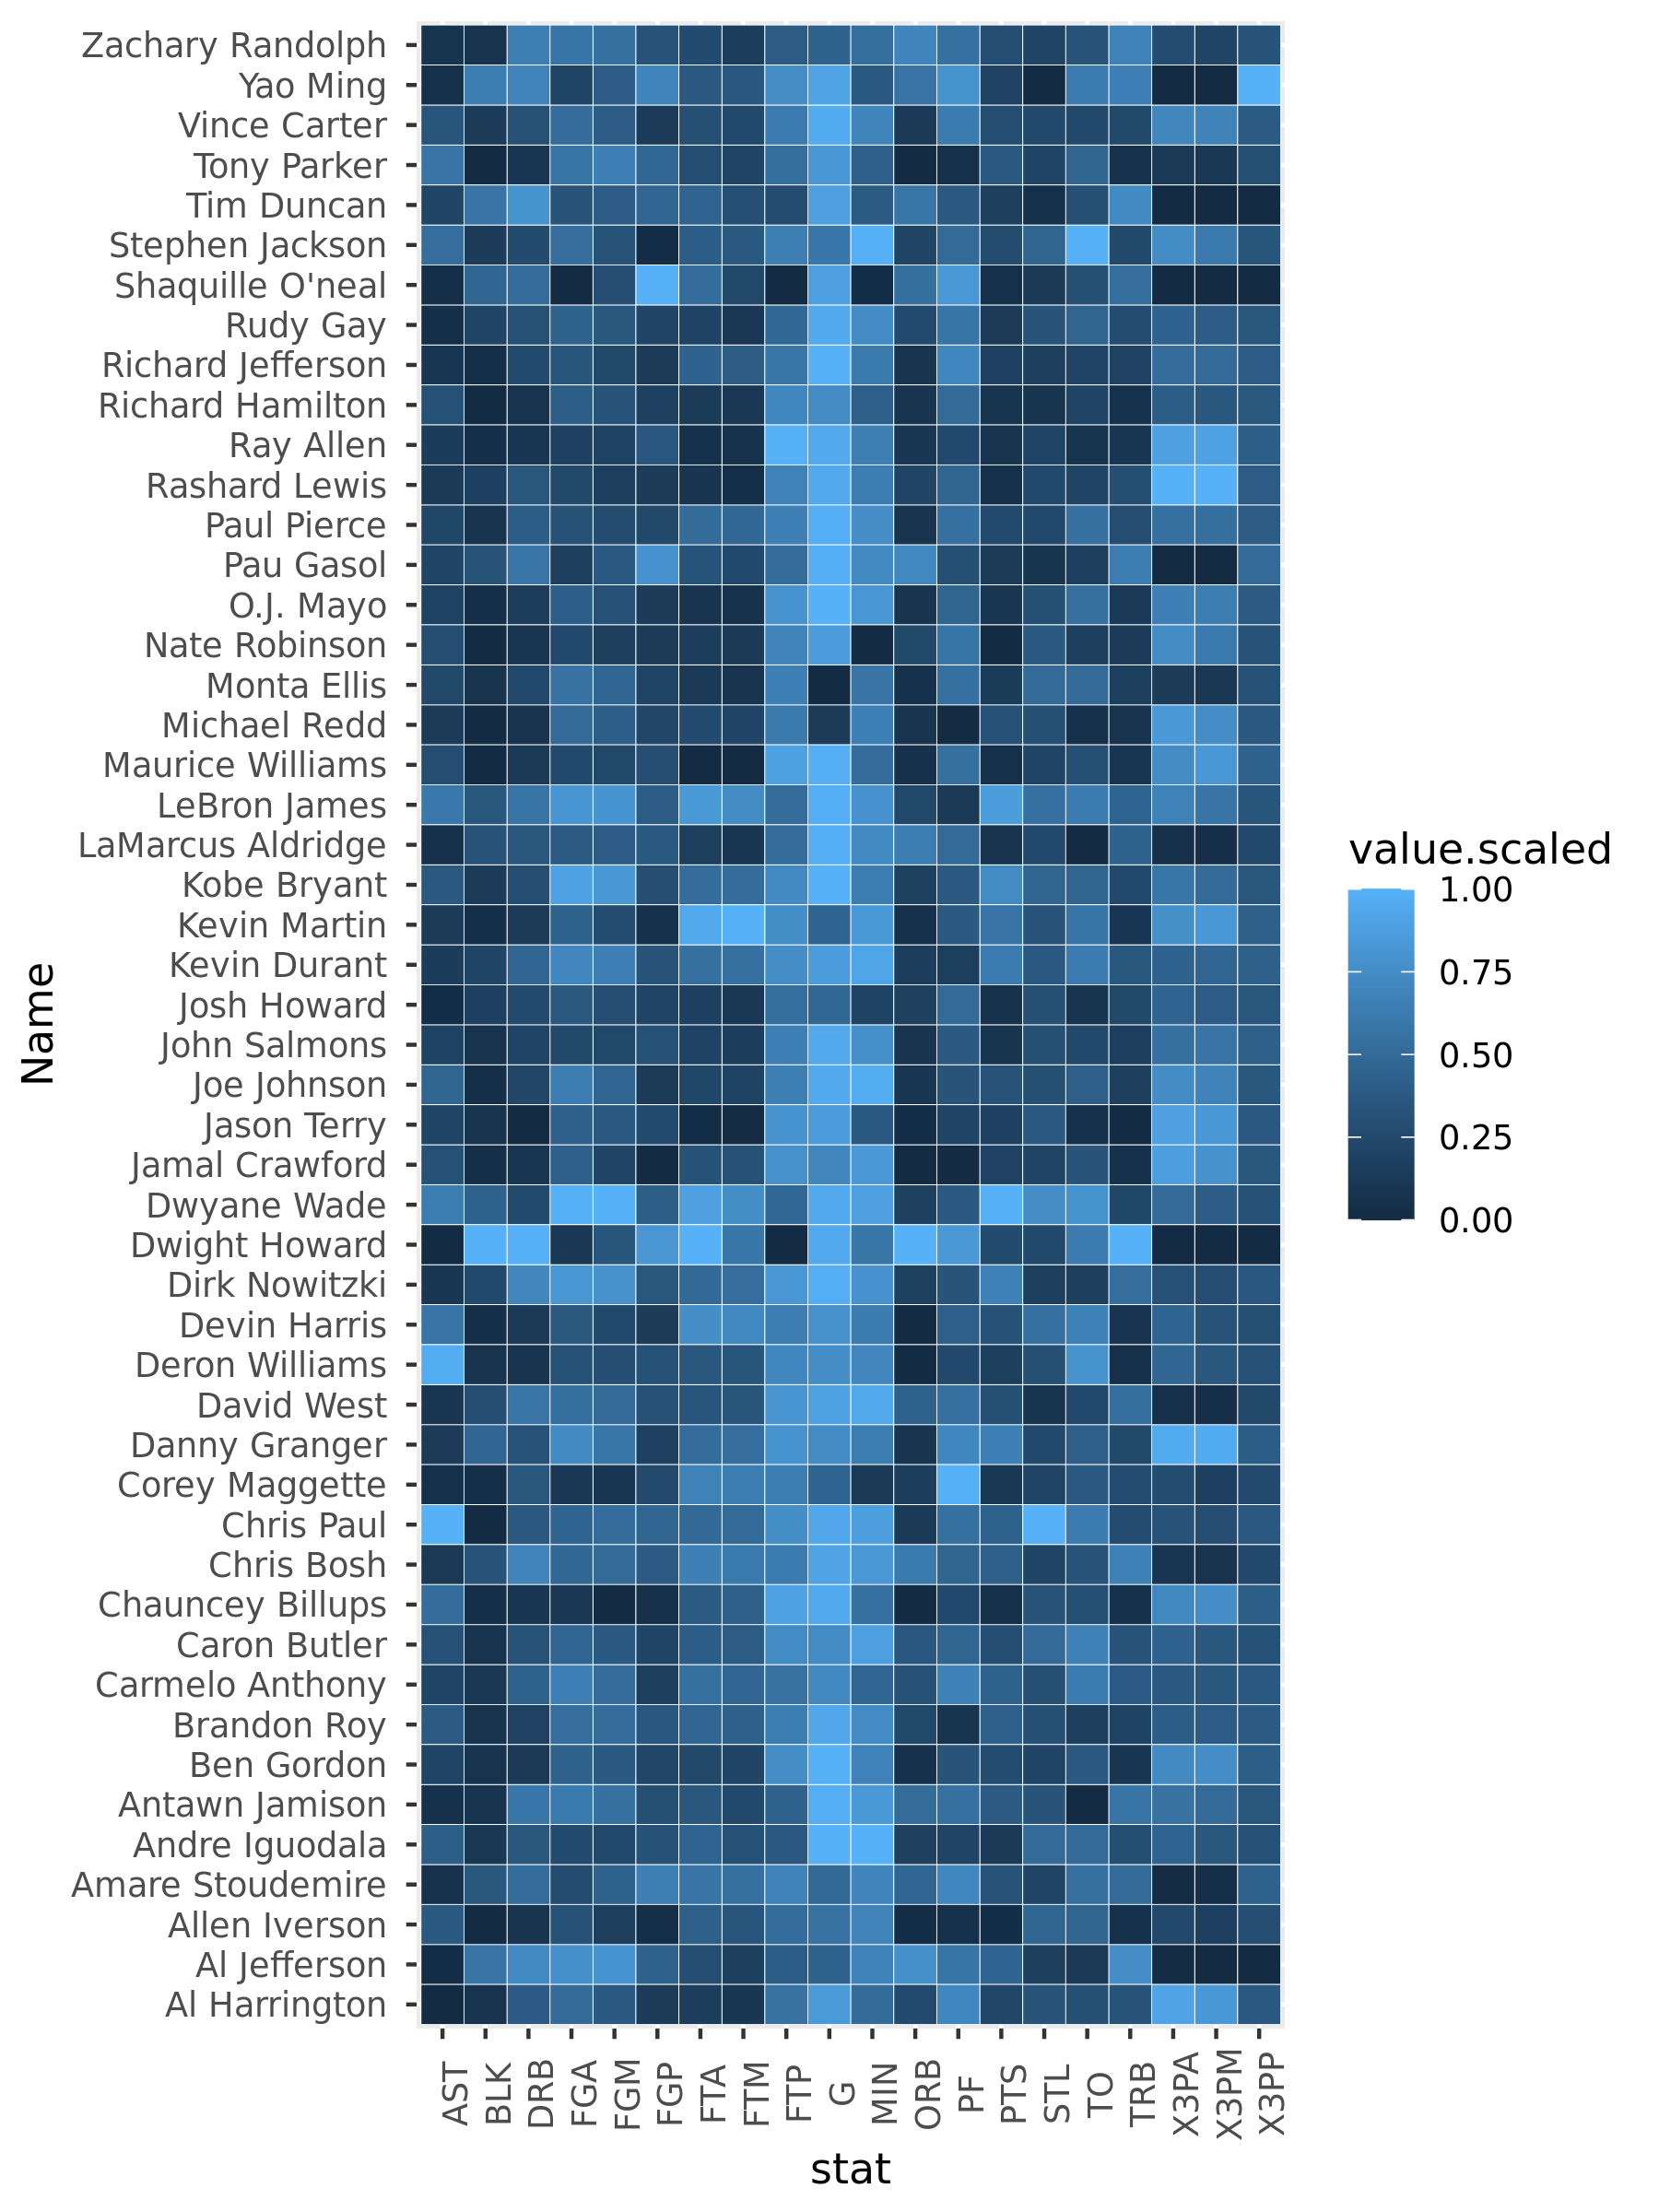

In [29]:
options(repr.plot.width=6, repr.plot.height=8)

p = ggplot(nba.data, aes(x = stat, y = Name, fill = value.scaled))

p = p + geom_tile(color = 'white')

p = p + theme(axis.text.x = element_text(angle = 90))

p

- adjust color scale

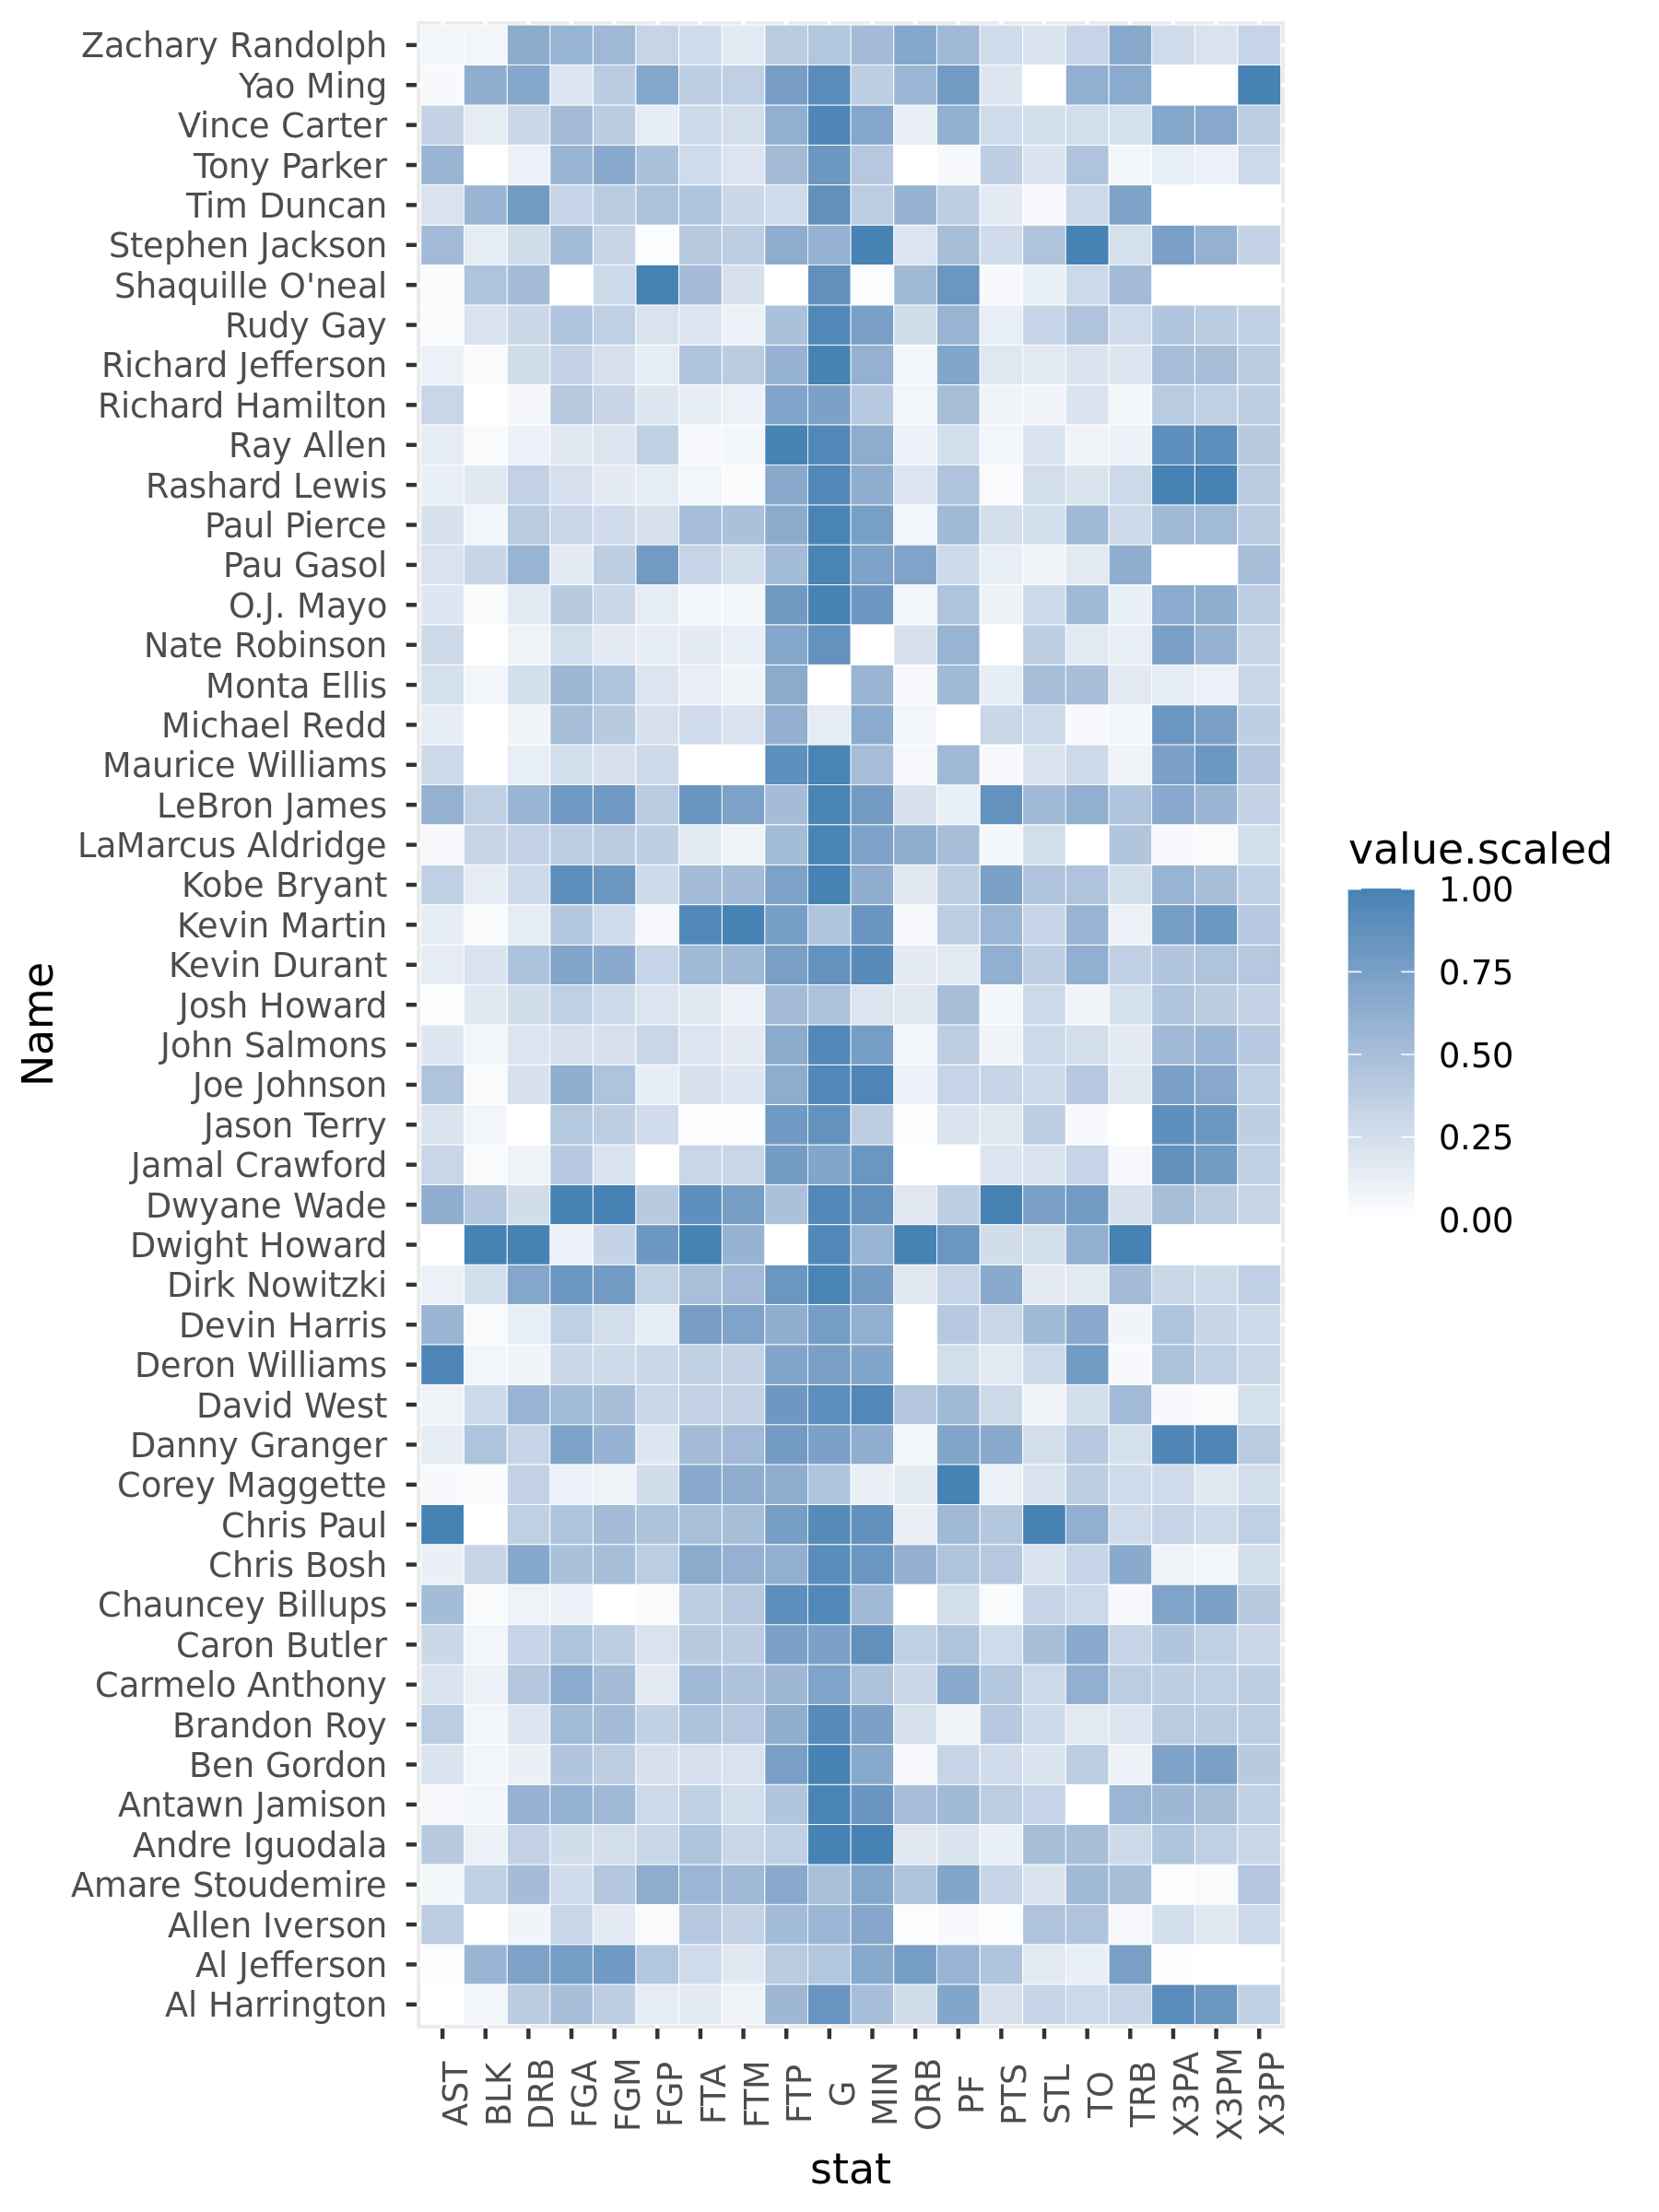

In [30]:
p = ggplot(nba.data, aes(x = stat, y = Name, fill = value.scaled))

p = p + geom_tile(color = 'white')

p = p + scale_fill_gradient(low = "white", high = "steelblue")

p = p + theme(axis.text.x = element_text(angle = 90))

p

- adjust axis text

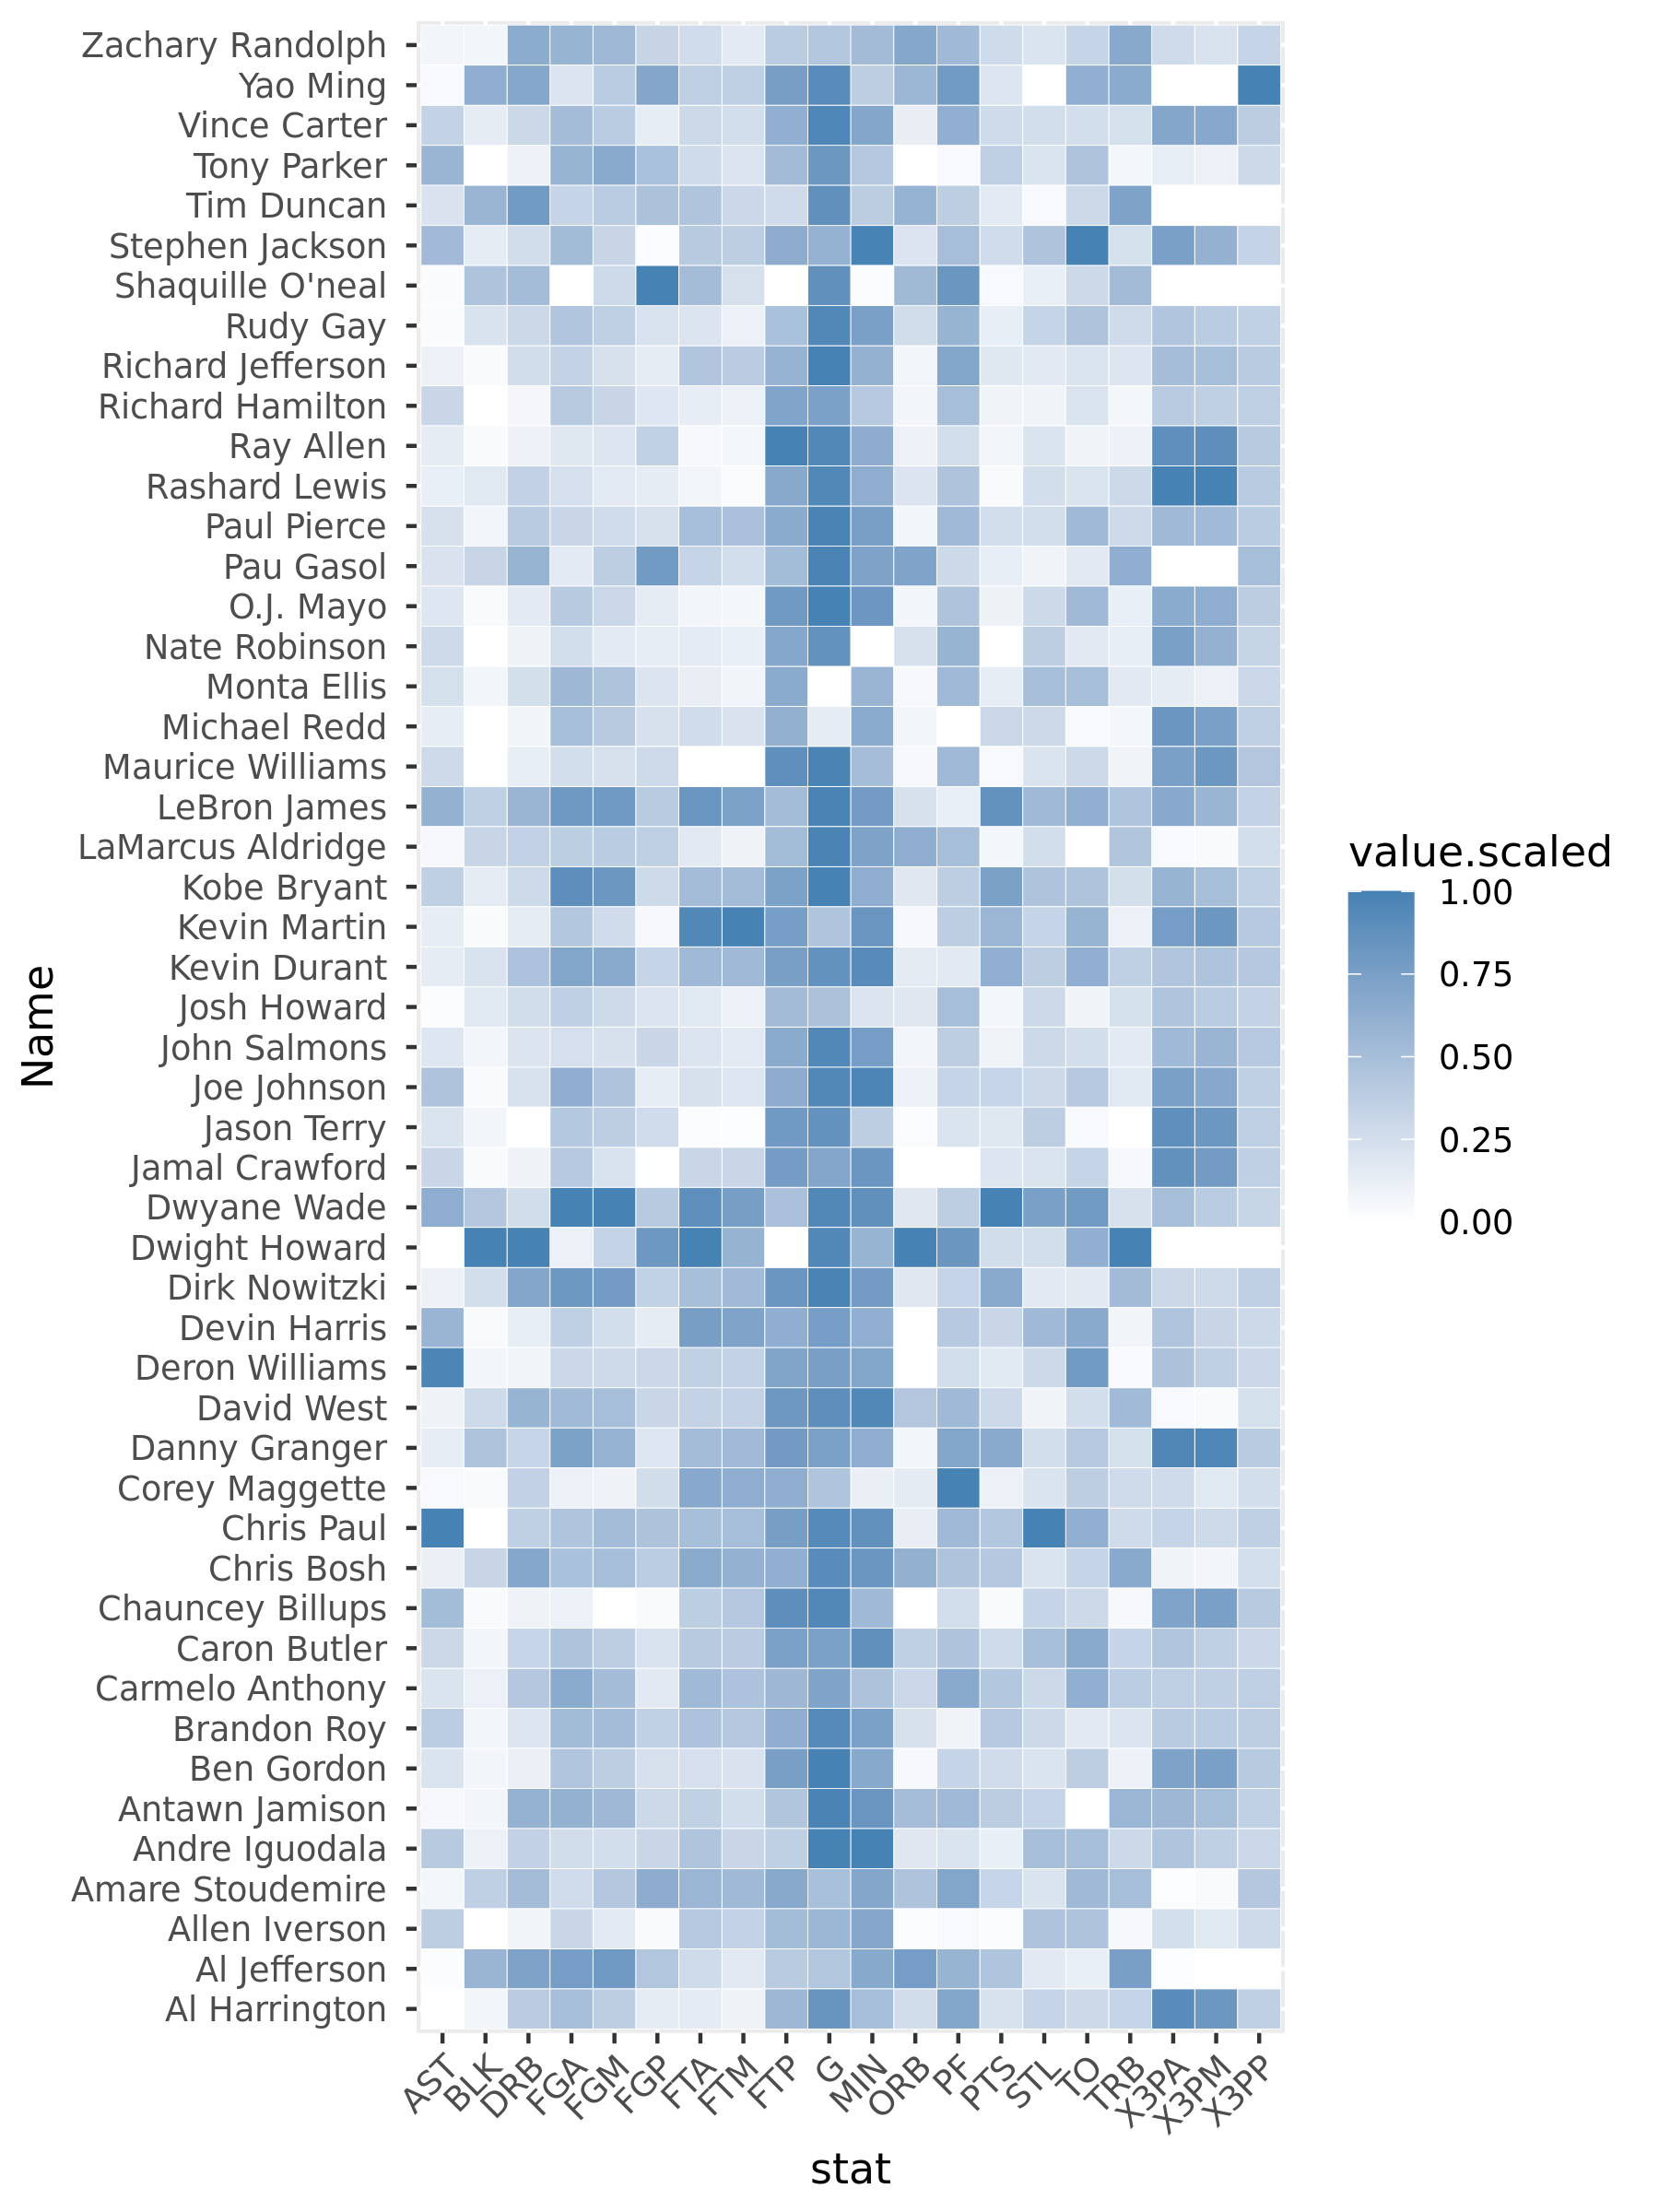

In [31]:
p = ggplot(nba.data, aes(x = stat, y = Name, fill = value.scaled)) +
    geom_tile(color = 'white') +
    scale_fill_gradient(low = "white", high = "steelblue") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

## Distributions

### Points with jitter

In [32]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


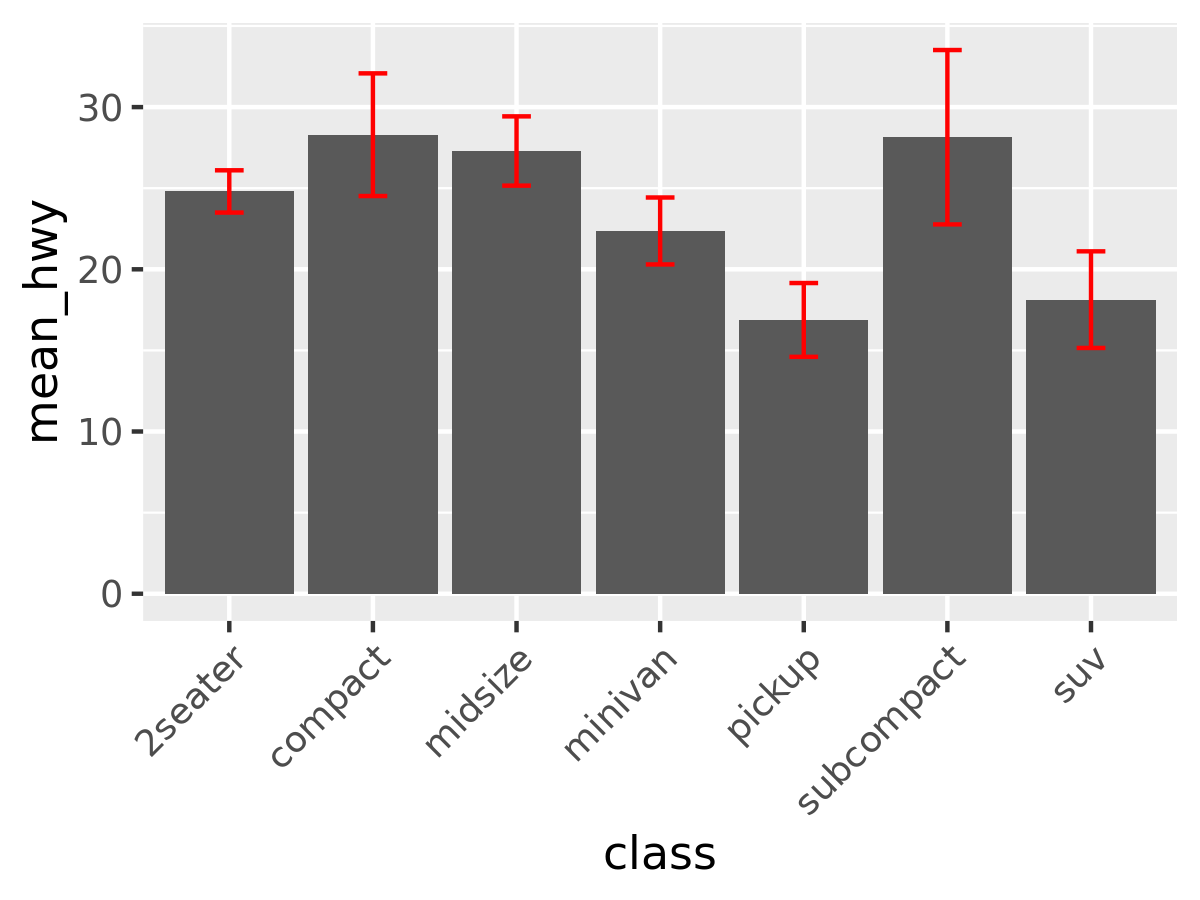

In [34]:
options(repr.plot.width=4, repr.plot.height=3)

df = mpg %>%
    group_by(class) %>%
    summarize(mean_hwy = mean(hwy), sd_hwy = sd(hwy))

p = ggplot(df, aes(x = class))

p = p + geom_bar(aes(y = mean_hwy), stat = 'identity')

p = p + geom_errorbar(aes(ymin = mean_hwy + sd_hwy, ymax = mean_hwy - sd_hwy),
                      color = 'red', width = 0.2)

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

How can we improve this? ☝️

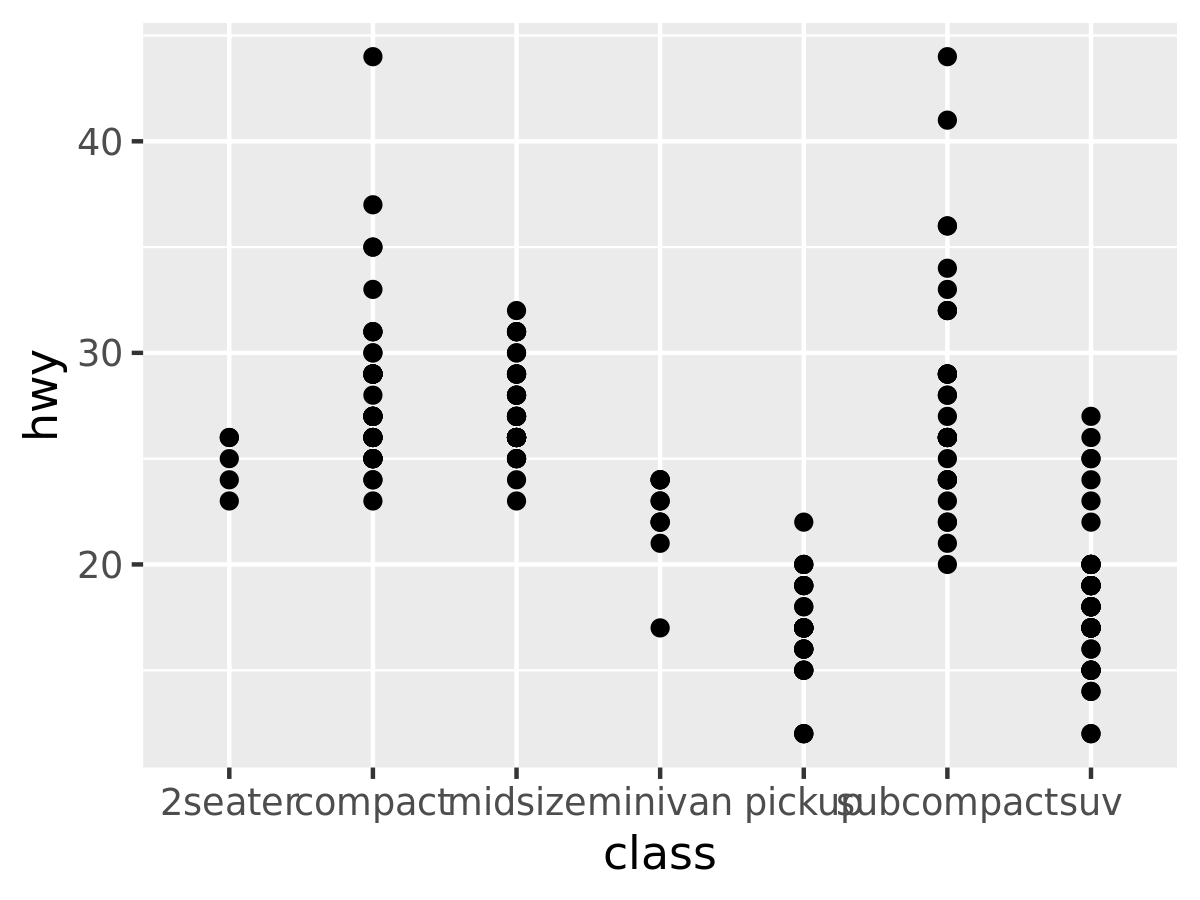

In [35]:
options(repr.plot.width=4, repr.plot.height=3)

p = ggplot(mpg, aes(x = class, y = hwy))

p = p + geom_point()

p

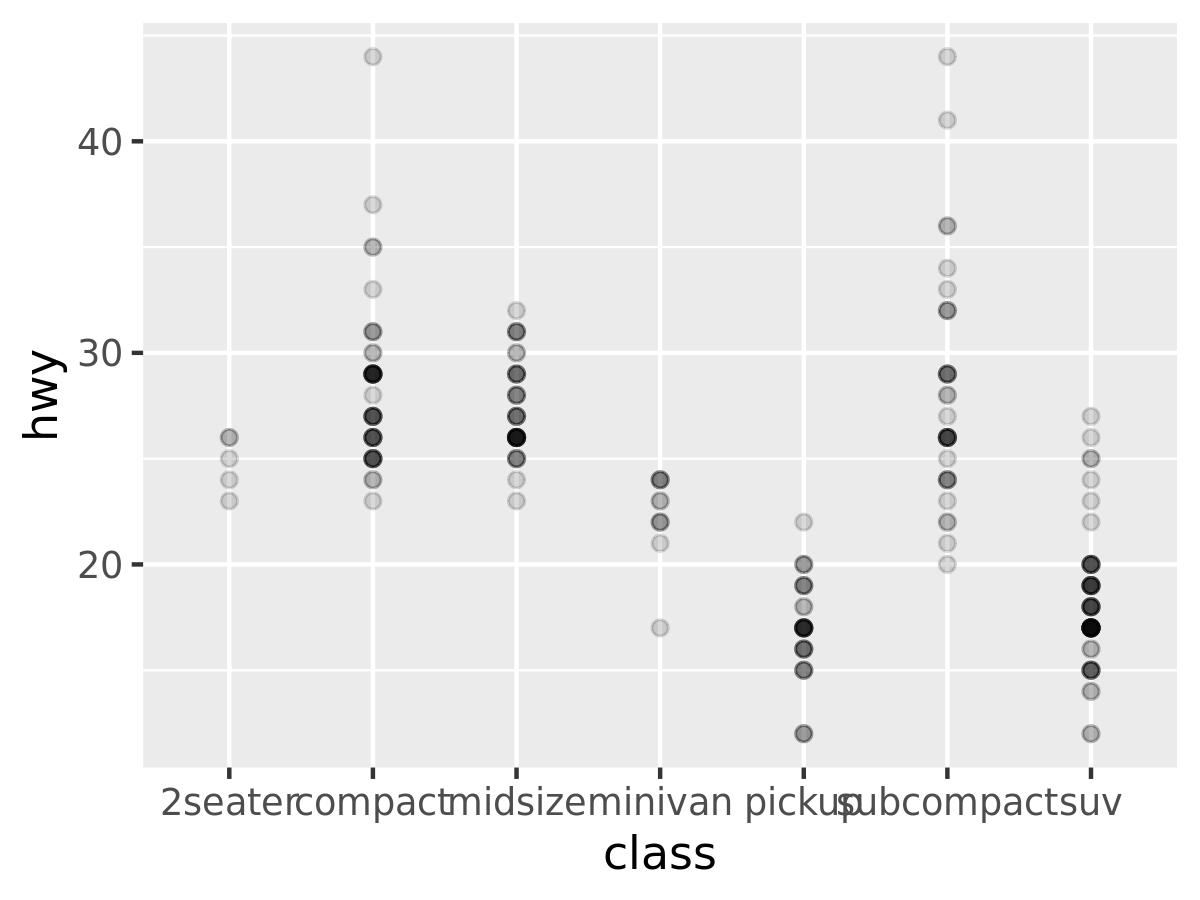

In [36]:
options(repr.plot.width=4, repr.plot.height=3)

p = ggplot(mpg, aes(x = class, y = hwy))

p = p + geom_point(alpha = 0.15)

p

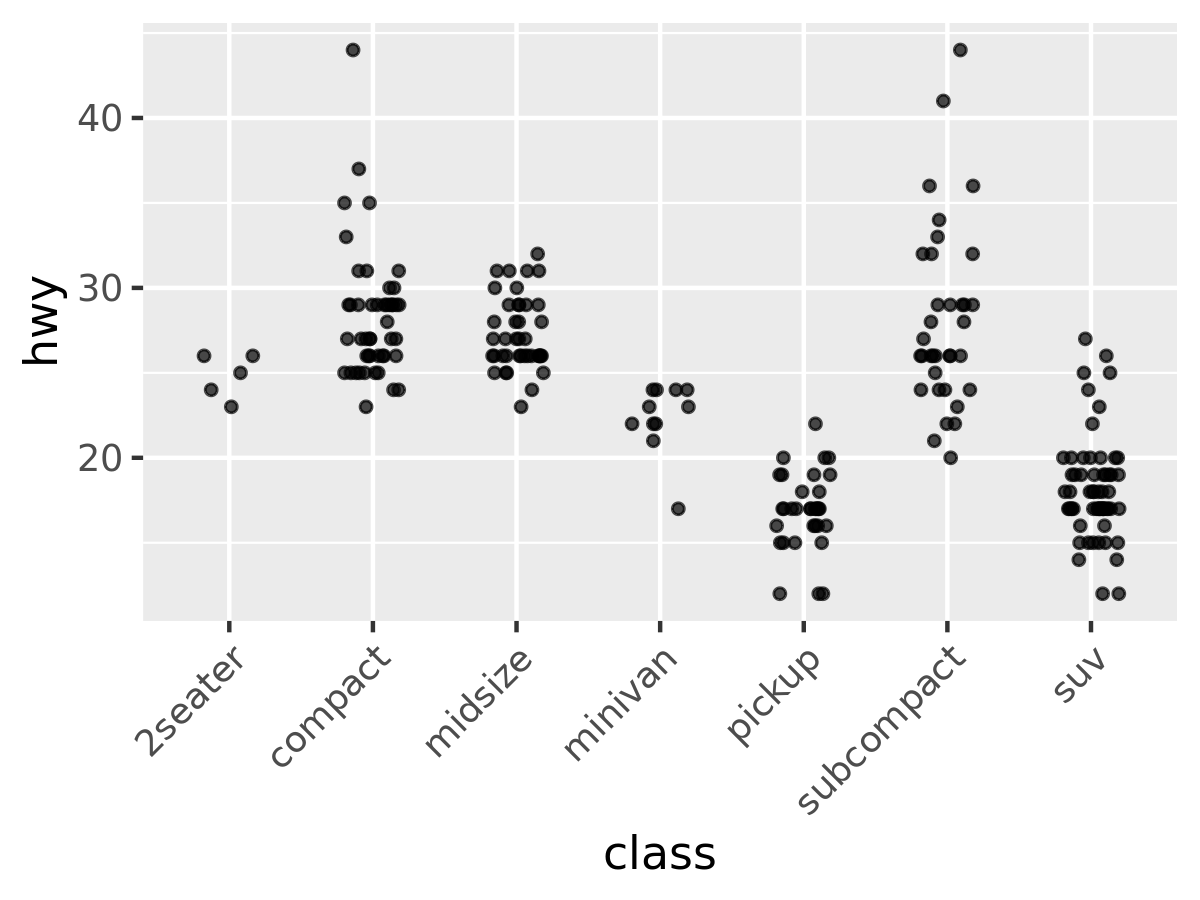

In [42]:
p = ggplot(mpg, aes(x = class, y = hwy))

p = p + geom_point(position = position_jitter(h = 0, w = 0.20), size = 1, alpha = 0.7)
# how to spread data around using position_jitter

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

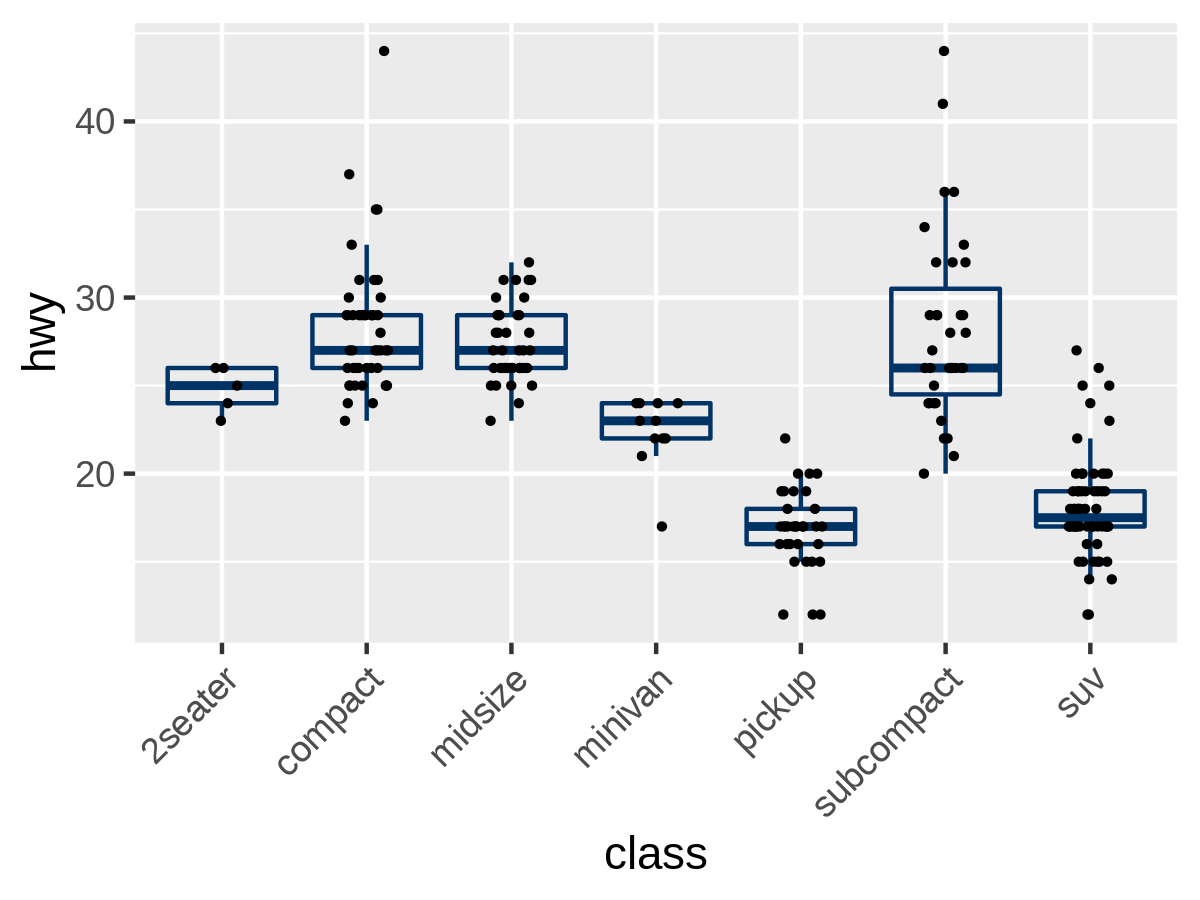

In [34]:
p = ggplot(mpg, aes(x = class, y = hwy))

p = p + geom_boxplot(fill = NA, outlier.shape = NA, color = '#003366')
# boxplot must come coded points if you want it behind points
# outlier.shape shows outlier points. would be reduntant to include with geom_point

p = p + geom_point(position = position_jitter(h = 0, w = 0.15), size = 0.5)

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

How can we improve this? ☝️

# Next lecture...
### Box plots
### Histograms
### KDE
### Rugs